# Problem Statement:-

Prosthetic Systems is a medical health provider with value added services towards its 
customer. Due to tough completion in the niche market, its struggling to sell its products and 
make profits. As they deal with only specialized products having very low volume, there is no 
way they can increase the sales to make up the revenue and the profit. The management is 
deciding to have a separate vertical that can finance the customers for the sales and services 
for these premium products. This will enable them to stay in the market, as well as they can 
expand their finance division if that rolls out well. As the company does not have a full banking 
experience or is not supervised by a national or international banking regulatory agency so 
they are going to tie up with a investment firm to start the company with some shared 
revenue model. Now the challenge for them is to determine how they are going to select the 
customers to reach out. The company wants to build a model that will help them identify the 
potential customers who have a higher probability of purchasing the loan. This will increase 
the success ratio while at the same time reduce the cost of the campaign.

## Goal

You are brought in as a consultant and your job is to build the best model which can classify 
the right customers who have a higher probability of purchasing the loan. You are expected 
to do the following: 

● EDA of the data available. Showcase the results using appropriate graphs

● Build appropriate models on both the test and train data (CART, Random Forest). Interpret
all the model outputs and do the necessary modifications wherever eligible (such as pruning)

● Check the performance of all the models that you have built (test and train). Use all the
model performance measures you have learned so far. Share your remarks on which model
performs the best.


Target Variable - Personal Loan 

In [1]:
# Loading the Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection,preprocessing,metrics,linear_model,tree,ensemble

In [2]:
# Loading the Dataset

df=pd.read_excel('Prosthetic Systems-Data Set.xlsx',sheet_name='Dataset')

# Display the dataset
df

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
0        1              25                      1                   49   
1        2              45                     19                   34   
2        3              39                     15                   11   
3        4              35                      9                  100   
4        5              35                      8                   45   
...    ...             ...                    ...                  ...   
4995  4996              29                      3                   40   
4996  4997              30                      4                   15   
4997  4998              63                     39                   24   
4998  4999              65                     40                   49   
4999  5000              28                      4                   83   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
0        91107             4.0    1.6          1         0              0   
1        90089             3.0    1.5          1         0              0   
2        94720             1.0    1.0          1         0              0   
3        94112             1.0    2.7          2         0              0   
4        91330             4.0    1.0          2         0              0   
...        ...             ...    ...        ...       ...            ...   
4995     92697             1.0    1.9          3         0              0   
4996     92037             4.0    0.4          1        85              0   
4997     93023             2.0    0.3          3         0              0   
4998     90034             3.0    0.5          2         0              0   
4999     92612             3.0    0.8          1         0              0   

      Securities Account  CD Account  Online  CreditCard  
0                      1           0       0           0  
1                      1           0       0           0  
2                      0           0       0           0  
3                      0           0       0           0  
4                      0           0       0           1  
...                  ...         ...     ...         ...  
4995                   0           0       1           0  
4996                   0           0       1           0  
4997                   0           0       0           0  
4998                   0           0       1           0  
4999                   0           0       1           1  

[5000 rows x 14 columns]

In [3]:
# Copying the original dataframe into another dataframe so that it will be safe

df1=df.copy()

In [4]:
#Checking the first five rows of the dataset

df1.head(5)

ID  Age (in years)  Experience (in years)  Income (in K/month)  ZIP Code  \
0   1              25                      1                   49     91107   
1   2              45                     19                   34     90089   
2   3              39                     15                   11     94720   
3   4              35                      9                  100     94112   
4   5              35                      8                   45     91330   

   Family members  CCAvg  Education  Mortgage  Personal Loan  \
0             4.0    1.6          1         0              0   
1             3.0    1.5          1         0              0   
2             1.0    1.0          1         0              0   
3             1.0    2.7          2         0              0   
4             4.0    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [5]:
# Checking the last five rows  of the dataset
df1.tail(5)

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
4995  4996              29                      3                   40   
4996  4997              30                      4                   15   
4997  4998              63                     39                   24   
4998  4999              65                     40                   49   
4999  5000              28                      4                   83   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
4995     92697             1.0    1.9          3         0              0   
4996     92037             4.0    0.4          1        85              0   
4997     93023             2.0    0.3          3         0              0   
4998     90034             3.0    0.5          2         0              0   
4999     92612             3.0    0.8          1         0              0   

      Securities Account  CD Account  Online  CreditCard  
4995                   0           0       1           0  
4996                   0           0       1           0  
4997                   0           0       0           0  
4998                   0           0       1           0  
4999                   0           0       1           1

In [6]:
#Summary of the dataset
df1.describe()

ID  Age (in years)  Experience (in years)  \
count  5000.000000     5000.000000            5000.000000   
mean   2500.500000       45.338400              20.104600   
std    1443.520003       11.463166              11.467954   
min       1.000000       23.000000              -3.000000   
25%    1250.750000       35.000000              10.000000   
50%    2500.500000       45.000000              20.000000   
75%    3750.250000       55.000000              30.000000   
max    5000.000000       67.000000              43.000000   

       Income (in K/month)      ZIP Code  Family members        CCAvg  \
count          5000.000000   5000.000000      4982.00000  5000.000000   
mean             73.774200  93152.503000         2.39723     1.937938   
std              46.033729   2121.852197         1.14716     1.747659   
min               8.000000   9307.000000         1.00000     0.000000   
25%              39.000000  91911.000000         1.00000     0.700000   
50%              64.000000  93437.000000         2.00000     1.500000   
75%              98.000000  94608.000000         3.00000     2.500000   
max             224.000000  96651.000000         4.00000    10.000000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000       0.000000            0.000000   
25%       1.000000     0.000000       0.000000            0.000000   
50%       2.000000     0.000000       0.000000            0.000000   
75%       3.000000   101.000000       0.000000            0.000000   
max       3.000000   635.000000       1.000000            1.000000   

       CD Account       Online   CreditCard  
count  5000.00000  5000.000000  5000.000000  
mean      0.06040     0.596800     0.294000  
std       0.23825     0.490589     0.455637  
min       0.00000     0.000000     0.000000  
25%       0.00000     0.000000     0.000000  
50%       0.00000     1.000000     0.000000  
75%       0.00000     1.000000     1.000000  
max       1.00000     1.000000     1.000000

In [7]:
import hotel_data_functions.functions as hdf
hdf.report_df(df1)

(5000, 14)


datatypes  num_unique  null_sum  null_pct   count  \
ID                        int64        5000         0    0.0000  5000.0   
Age (in years)            int64          45         0    0.0000  5000.0   
Experience (in years)     int64          47         0    0.0000  5000.0   
Income (in K/month)       int64         162         0    0.0000  5000.0   
ZIP Code                  int64         467         0    0.0000  5000.0   
Family members          float64           4        18    0.0036  4982.0   
CCAvg                   float64         108         0    0.0000  5000.0   
Education                 int64           3         0    0.0000  5000.0   
Mortgage                  int64         347         0    0.0000  5000.0   
Personal Loan             int64           2         0    0.0000  5000.0   
Securities Account        int64           2         0    0.0000  5000.0   
CD Account                int64           2         0    0.0000  5000.0   
Online                    int64           2         0    0.0000  5000.0   
CreditCard                int64           2         0    0.0000  5000.0   

                               mean          std     min       25%      50%  \
ID                      2500.500000  1443.520003     1.0   1250.75   2500.5   
Age (in years)            45.338400    11.463166    23.0     35.00     45.0   
Experience (in years)     20.104600    11.467954    -3.0     10.00     20.0   
Income (in K/month)       73.774200    46.033729     8.0     39.00     64.0   
ZIP Code               93152.503000  2121.852197  9307.0  91911.00  93437.0   
Family members             2.397230     1.147160     1.0      1.00      2.0   
CCAvg                      1.937938     1.747659     0.0      0.70      1.5   
Education                  1.881000     0.839869     1.0      1.00      2.0   
Mortgage                  56.498800   101.713802     0.0      0.00      0.0   
Personal Loan              0.096000     0.294621     0.0      0.00      0.0   
Securities Account         0.104400     0.305809     0.0      0.00      0.0   
CD Account                 0.060400     0.238250     0.0      0.00      0.0   
Online                     0.596800     0.490589     0.0      0.00      1.0   
CreditCard                 0.294000     0.455637     0.0      0.00      0.0   

                            75%      max  
ID                      3750.25   5000.0  
Age (in years)            55.00     67.0  
Experience (in years)     30.00     43.0  
Income (in K/month)       98.00    224.0  
ZIP Code               94608.00  96651.0  
Family members             3.00      4.0  
CCAvg                      2.50     10.0  
Education                  3.00      3.0  
Mortgage                 101.00    635.0  
Personal Loan              0.00      1.0  
Securities Account         0.00      1.0  
CD Account                 0.00      1.0  
Online                     1.00      1.0  
CreditCard                 1.00      1.0

In [8]:
#Information of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age (in years)         5000 non-null   int64  
 2   Experience (in years)  5000 non-null   int64  
 3   Income (in K/month)    5000 non-null   int64  
 4   ZIP Code               5000 non-null   int64  
 5   Family members         4982 non-null   float64
 6   CCAvg                  5000 non-null   float64
 7   Education              5000 non-null   int64  
 8   Mortgage               5000 non-null   int64  
 9   Personal Loan          5000 non-null   int64  
 10  Securities Account     5000 non-null   int64  
 11  CD Account             5000 non-null   int64  
 12  Online                 5000 non-null   int64  
 13  CreditCard             5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [9]:
# Checking the Missing Values in the dataset

df1.isnull().sum()

ID                        0
Age (in years)            0
Experience (in years)     0
Income (in K/month)       0
ZIP Code                  0
Family members           18
CCAvg                     0
Education                 0
Mortgage                  0
Personal Loan             0
Securities Account        0
CD Account                0
Online                    0
CreditCard                0
dtype: int64

There are missing values in the dataset so we need to handle it first so there are many approach to solve or handle it.In this
case we will use imputation as the dataset is small and mode as measures of central tendency.

Missing Data Column- Family members

In [10]:
# Checking the value_counts of the column (family members)
df1['Family members'].value_counts()

1.0    1464
2.0    1292
4.0    1217
3.0    1009
Name: Family members, dtype: int64

In [11]:
# Imputing the missing value with the most frequency category
df1['Family members'].fillna(df1['Family members'].mode()[0],inplace=True)

In [12]:
# Checking if the imputing is corrected done or not
df1['Family members'].value_counts()

1.0    1482
2.0    1292
4.0    1217
3.0    1009
Name: Family members, dtype: int64

Yes the imputation of the missing data  is done correctly so we now move on to exploring the dataset and find meaningful insights that will help you to determine what features are important to predict the higher probability of purchasing loan customer through campaign

# UniVariate Analysis

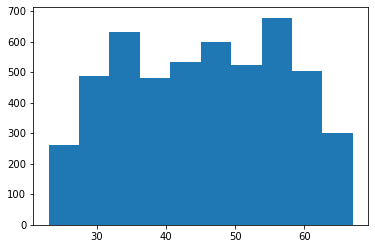

In [13]:
# Univariate Analysis with respect to Age

plt.hist(df1['Age (in years)'])
plt.show()

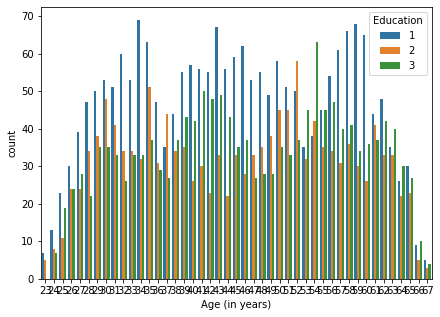

In [14]:
plt.subplots(figsize=(7,5))
sns.countplot(x='Age (in years)', hue='Education',  data=df1);

In [15]:
df1.columns

Index(['ID', 'Age (in years)', 'Experience (in years)', 'Income (in K/month)',
       'ZIP Code', 'Family members', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

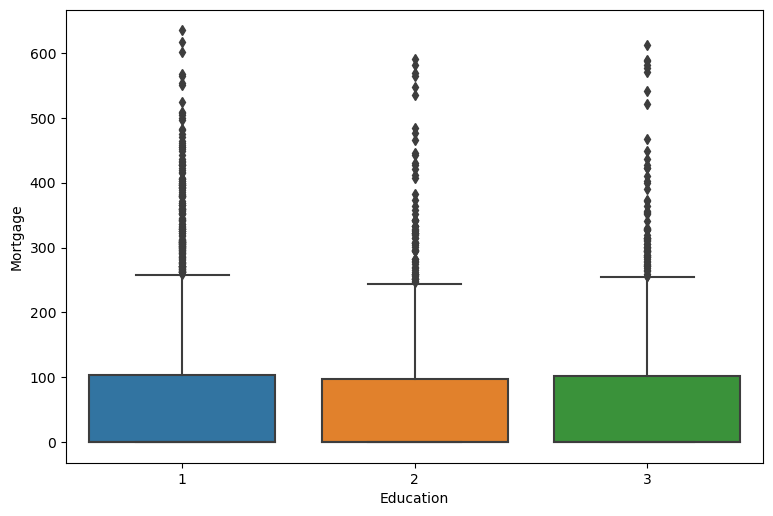

In [16]:
data =df1
fig = plt.figure(figsize=(9,6), dpi = 100)
sns.boxplot(data= data, y = 'Mortgage', x= 'Education')#, hue = 'CreditCard')

<AxesSubplot:xlabel='Personal Loan', ylabel='Income (in K/month)'>

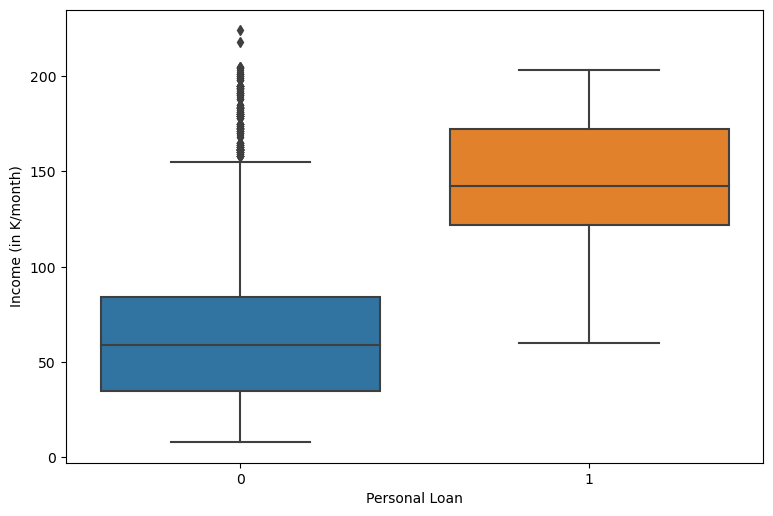

In [17]:
data =df1
fig = plt.figure(figsize=(9,6), dpi = 100)
sns.boxplot(data= data, x = 'Personal Loan', y = 'Income (in K/month)')#, hue = 'CreditCard')

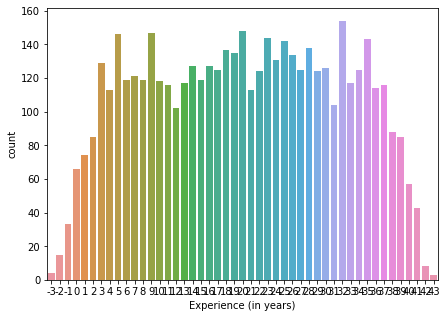

In [18]:
# UniVariate Analysis with respect to Experience
plt.subplots(figsize=(7,5))
sns.countplot(x='Experience (in years)',  data=df1);

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


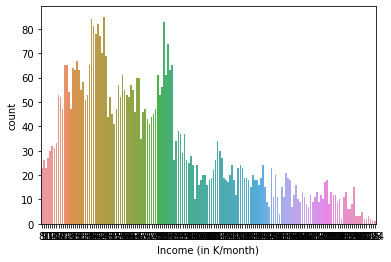

In [19]:
# UniVariate Analysis with respect to Income
#Skewed Distribution
sns.countplot(df1['Income (in K/month)'])
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


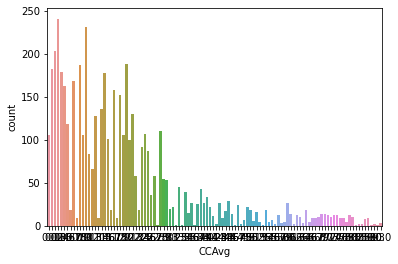

In [20]:
# UniVariate Analysis with respect to CCAvg
#Right Skewed Distribution
sns.countplot(df1['CCAvg'])
plt.show()

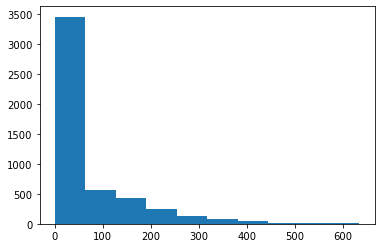

In [21]:
# UniVariate Analysis with respect to Mortgage
#Right Skewed Distribution
plt.hist(df1['Mortgage'])
plt.show()

# Bi Variate Analysis

# 1) Does Age has any affect on purchasing the Personal Loan and What Age Bracket buy the personal loan the most Lets find out with the Analysis?

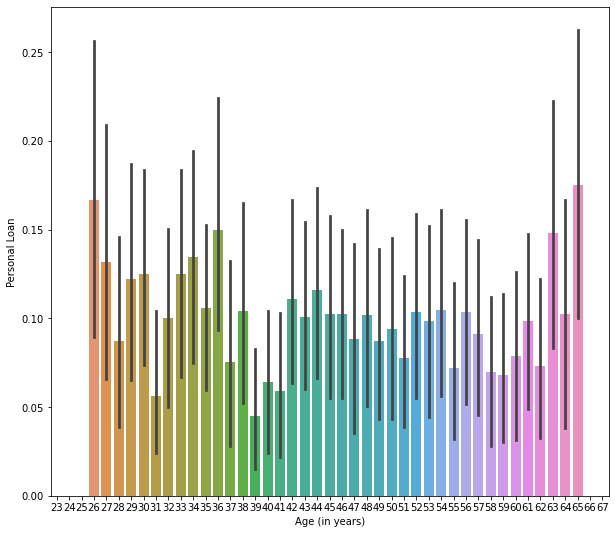

In [22]:
# Checking the relationship between Age and Personal Loan
fig=plt.figure(figsize=(10,9))
sns.barplot(x='Age (in years)',y='Personal Loan',data=df1)
#plt.xticks()
plt.show()

<AxesSubplot:xlabel='Age (in years)', ylabel='Personal Loan'>

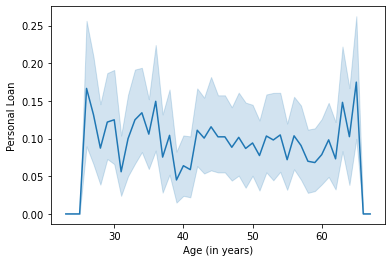

In [23]:
# Checking the relationship between Age (in years) and Personal Loan with the help of lineplot
sns.lineplot(x='Age (in years)',y='Personal Loan',data=df1)

In [24]:
# Checking whether there is any Age less than 0

df1[df1['Age (in years)']<0]

Empty DataFrame
Columns: [ID, Age (in years), Experience (in years), Income (in K/month), ZIP Code, Family members, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

# Does Experience (in years) has higher probability of purchasing a Personal Loan?

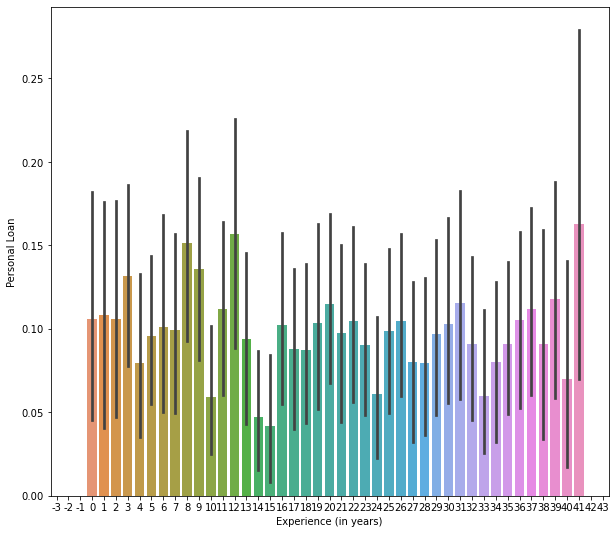

In [25]:
# Checking the relationship between Experience and Personal Loan
fig=plt.figure(figsize=(10,9))
sns.barplot(x='Experience (in years)',y='Personal Loan',data=df1)
plt.show()

In [26]:
# Checking the Experience less than 14 and Buying A Personal Loan
df1[(df1['Experience (in years)']<14) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
9       10              34                      9                  180   
29      30              38                     13                  119   
42      43              32                      7                  132   
47      48              37                     12                  194   
75      76              31                      7                  135   
...    ...             ...                    ...                  ...   
4846  4847              35                     10                  135   
4859  4860              34                      8                  165   
4883  4884              38                     13                  129   
4941  4942              28                      4                  112   
4980  4981              29                      5                  135   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
9        93023             1.0    8.9          3         0              1   
29       94104             1.0    3.3          2         0              1   
42       90019             4.0    1.1          2       412              1   
47       91380             4.0    0.2          3       211              1   
75       94901             4.0    3.8          2         0              1   
...        ...             ...    ...        ...       ...            ...   
4846     94596             3.0    4.8          2         0              1   
4859     91107             1.0    7.0          3       541              1   
4883     92646             3.0    4.1          3         0              1   
4941     90049             2.0    1.6          2         0              1   
4980     95762             3.0    5.3          1         0              1   

      Securities Account  CD Account  Online  CreditCard  
9                      0           0       0           0  
29                     0           1       1           1  
42                     0           0       1           0  
47                     1           1       1           1  
75                     0           1       1           1  
...                  ...         ...     ...         ...  
4846                   0           0       1           0  
4859                   0           0       0           0  
4883                   0           1       1           1  
4941                   0           0       1           0  
4980                   0           1       1           1  

[173 rows x 14 columns]

In [27]:
# Checking the Experience greater than 15 and Buying A Personal Loan
df1[(df1['Experience (in years)']>15) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
18      19              46                     21                  193   
38      39              42                     18                  141   
53      54              50                     26                  190   
57      58              56                     31                  131   
78      79              54                     30                  133   
...    ...             ...                    ...                  ...   
4842  4843              49                     23                  174   
4865  4866              50                     24                  133   
4876  4877              44                     19                  142   
4927  4928              43                     19                  121   
4962  4963              46                     20                  122   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
18       91604             2.0    8.1          3         0              1   
38       94114             3.0    5.0          3         0              1   
53       90245             3.0    2.1          3       240              1   
57       95616             2.0    1.2          3         0              1   
78       93305             2.0    2.6          3         0              1   
...        ...             ...    ...        ...       ...            ...   
4842     95449             3.0    4.6          2       590              1   
4865     90025             4.0    1.4          2       342              1   
4876     95054             1.0    1.5          3         0              1   
4927     94720             1.0    0.7          2         0              1   
4962     90065             3.0    3.0          3         0              1   

      Securities Account  CD Account  Online  CreditCard  
18                     0           0       0           0  
38                     1           1       1           0  
53                     0           0       1           0  
57                     0           0       0           0  
78                     0           0       0           0  
...                  ...         ...     ...         ...  
4842                   0           0       0           0  
4865                   0           0       0           1  
4876                   0           0       0           0  
4927                   0           1       1           1  
4962                   0           1       1           1  

[296 rows x 14 columns]

In [28]:
# Checking the Experience greater than 30 and Buying A Personal Loan

df1[(df1['Experience (in years)']>30) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
57      58              56                     31                  131   
131    132              58                     34                  149   
209    210              64                     39                  172   
243    244              65                     39                  170   
254    255              65                     41                  134   
...    ...             ...                    ...                  ...   
4418  4419              59                     34                  145   
4422  4423              57                     31                  164   
4590  4591              58                     34                  151   
4642  4643              65                     40                  143   
4705  4706              61                     37                  141   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
57       95616             2.0    1.2          3         0              1   
131      93720             4.0    7.2          2         0              1   
209      94707             4.0    3.1          1       282              1   
243      90095             3.0    7.9          3        99              1   
254      91942             3.0    3.9          3       121              1   
...        ...             ...    ...        ...       ...            ...   
4418     95125             4.0    1.8          1       198              1   
4422     94607             2.0    3.8          3       422              1   
4590     94022             3.0    0.6          2         0              1   
4642     95616             4.0    6.6          2         0              1   
4705     92677             3.0    0.7          1         0              1   

      Securities Account  CD Account  Online  CreditCard  
57                     0           0       0           0  
131                    0           1       1           1  
209                    0           1       1           1  
243                    0           1       1           0  
254                    0           0       1           0  
...                  ...         ...     ...         ...  
4418                   0           0       1           0  
4422                   0           1       1           1  
4590                   0           0       0           0  
4642                   0           0       1           0  
4705                   0           1       1           1  

[110 rows x 14 columns]

In [29]:
# Checking the Experience (in years ) greater than 40 and Buying A Personal Loan
df1[(df1['Experience (in years)']>40) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
254    255              65                     41                  134   
382    383              65                     41                  133   
662    663              65                     41                  185   
671    672              65                     41                  105   
914    915              65                     41                  195   
1418  1419              65                     41                  154   
4310  4311              65                     41                  170   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
254      91942             3.0    3.9          3       121              1   
382      94904             4.0    2.0          1         0              1   
662      93561             3.0    2.0          2         0              1   
671      92612             1.0    3.0          2       282              1   
914      91711             3.0    0.4          1         0              1   
1418     92008             2.0    4.6          2         0              1   
4310     94143             4.0    6.1          2         0              1   

      Securities Account  CD Account  Online  CreditCard  
254                    0           0       1           0  
382                    0           0       0           1  
662                    0           0       0           0  
671                    1           1       1           0  
914                    1           1       0           1  
1418                   1           1       1           1  
4310                   0           1       1           1

# Does Income has higher probability of purchasing a personal loan?

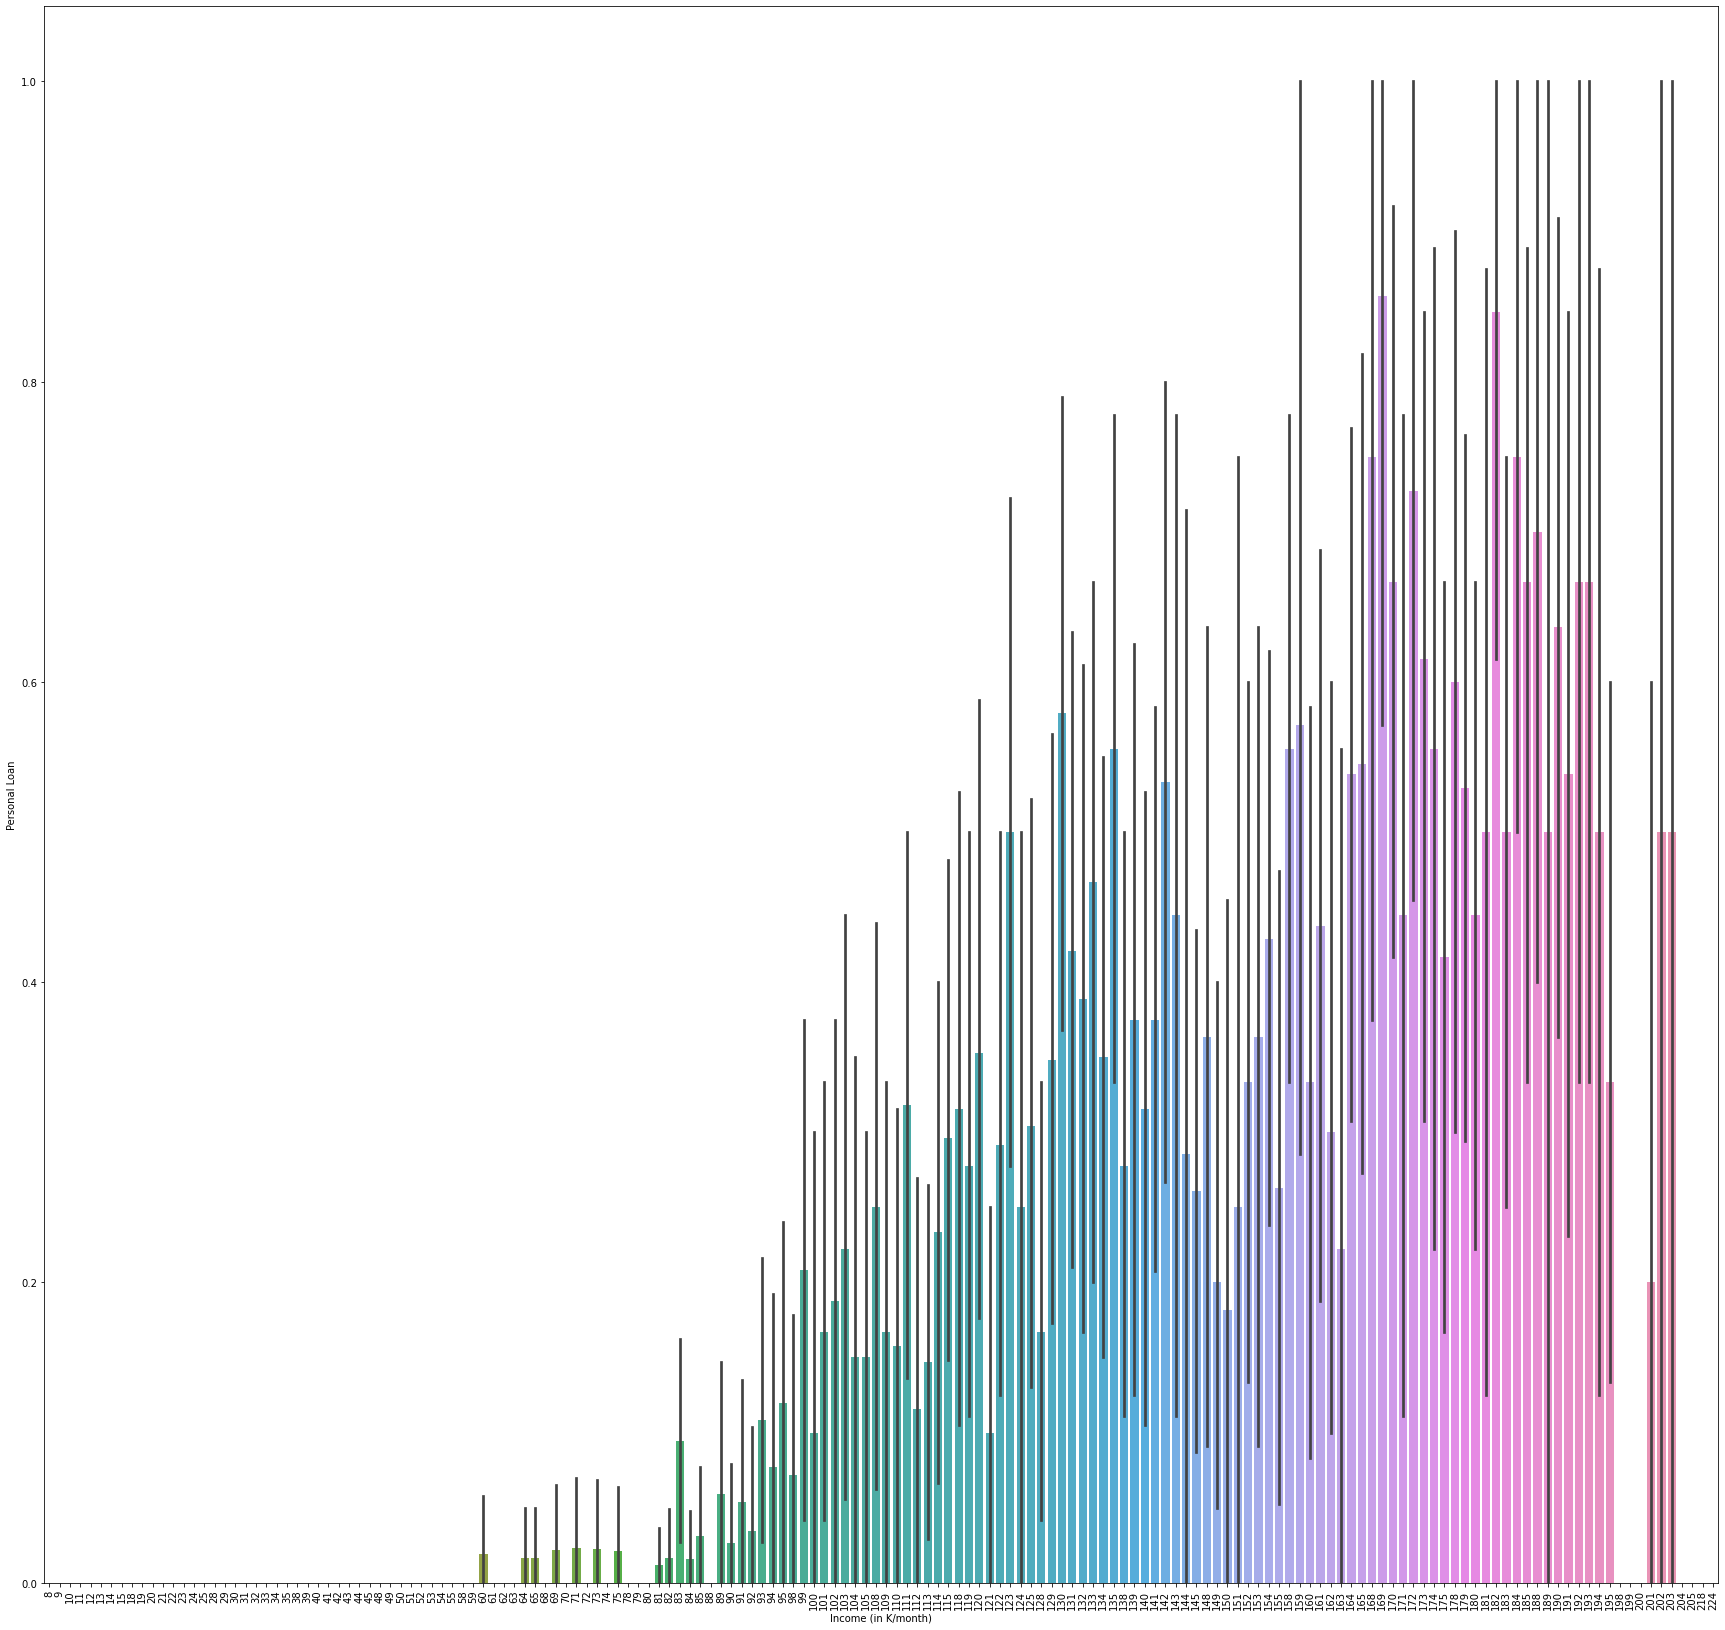

In [30]:
fig=plt.figure(figsize=(30,29))
sns.barplot(x='Income (in K/month)',y='Personal Loan',data=df1)
plt.xticks(rotation=90)
plt.show()

In [31]:
df1['Income (in K/month)'].value_counts().head(10)

44    85
38    84
81    83
41    82
39    81
40    78
42    77
83    74
43    70
45    69
Name: Income (in K/month), dtype: int64

In [32]:
# Checking the Anomalies in the Dataset
df1[df1['Income (in K/month)']<0]

Empty DataFrame
Columns: [ID, Age (in years), Experience (in years), Income (in K/month), ZIP Code, Family members, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [33]:
# Checking the Income less than 50 and buying a Personal Loan

df1[(df1['Income (in K/month)']<50) & (df1['Personal Loan']==1)]

Empty DataFrame
Columns: [ID, Age (in years), Experience (in years), Income (in K/month), ZIP Code, Family members, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [34]:
# Checking the Income less than 150 and buying a Personal Loan

df1[(df1['Income (in K/month)']<150) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
16      17              38                     14                  130   
29      30              38                     13                  119   
38      39              42                     18                  141   
42      43              32                      7                  132   
57      58              56                     31                  131   
...    ...             ...                    ...                  ...   
4883  4884              38                     13                  129   
4927  4928              43                     19                  121   
4941  4942              28                      4                  112   
4962  4963              46                     20                  122   
4980  4981              29                      5                  135   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
16       95010             4.0    4.7          3       134              1   
29       94104             1.0    3.3          2         0              1   
38       94114             3.0    5.0          3         0              1   
42       90019             4.0    1.1          2       412              1   
57       95616             2.0    1.2          3         0              1   
...        ...             ...    ...        ...       ...            ...   
4883     92646             3.0    4.1          3         0              1   
4927     94720             1.0    0.7          2         0              1   
4941     90049             2.0    1.6          2         0              1   
4962     90065             3.0    3.0          3         0              1   
4980     95762             3.0    5.3          1         0              1   

      Securities Account  CD Account  Online  CreditCard  
16                     0           0       0           0  
29                     0           1       1           1  
38                     1           1       1           0  
42                     0           0       1           0  
57                     0           0       0           0  
...                  ...         ...     ...         ...  
4883                   0           1       1           1  
4927                   0           1       1           1  
4941                   0           0       1           0  
4962                   0           1       1           1  
4980                   0           1       1           1  

[260 rows x 14 columns]

In [35]:
# Checking the Income greater than 150  and Buying a Personal Loan
df1[(df1['Income (in K/month)']>100) &  (df1['Income (in K/month)']<=150) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
16      17              38                     14                  130   
29      30              38                     13                  119   
38      39              42                     18                  141   
42      43              32                      7                  132   
57      58              56                     31                  131   
...    ...             ...                    ...                  ...   
4883  4884              38                     13                  129   
4927  4928              43                     19                  121   
4941  4942              28                      4                  112   
4962  4963              46                     20                  122   
4980  4981              29                      5                  135   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
16       95010             4.0    4.7          3       134              1   
29       94104             1.0    3.3          2         0              1   
38       94114             3.0    5.0          3         0              1   
42       90019             4.0    1.1          2       412              1   
57       95616             2.0    1.2          3         0              1   
...        ...             ...    ...        ...       ...            ...   
4883     92646             3.0    4.1          3         0              1   
4927     94720             1.0    0.7          2         0              1   
4941     90049             2.0    1.6          2         0              1   
4962     90065             3.0    3.0          3         0              1   
4980     95762             3.0    5.3          1         0              1   

      Securities Account  CD Account  Online  CreditCard  
16                     0           0       0           0  
29                     0           1       1           1  
38                     1           1       1           0  
42                     0           0       1           0  
57                     0           0       0           0  
...                  ...         ...     ...         ...  
4883                   0           1       1           1  
4927                   0           1       1           1  
4941                   0           0       1           0  
4962                   0           1       1           1  
4980                   0           1       1           1  

[220 rows x 14 columns]

In [36]:
# Checking the Income between 150 and 175 and Buying A Personal Loan
df1[(df1['Income (in K/month)']>150) & (df1['Income (in K/month)']<=175) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
174    175              42                     17                  168   
187    188              46                     21                  159   
199    200              36                     11                  158   
209    210              64                     39                  172   
243    244              65                     39                  170   
...    ...             ...                    ...                  ...   
4590  4591              58                     34                  151   
4698  4699              48                     22                  162   
4763  4764              51                     25                  173   
4842  4843              49                     23                  174   
4859  4860              34                      8                  165   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
174      95503             2.0    7.9          2         0              1   
187      94305             3.0    1.9          3       315              1   
199      92152             1.0    5.1          3         0              1   
209      94707             4.0    3.1          1       282              1   
243      90095             3.0    7.9          3        99              1   
...        ...             ...    ...        ...       ...            ...   
4590     94022             3.0    0.6          2         0              1   
4698     94143             3.0    1.4          1       400              1   
4763     95051             1.0    0.5          2         0              1   
4842     95449             3.0    4.6          2       590              1   
4859     91107             1.0    7.0          3       541              1   

      Securities Account  CD Account  Online  CreditCard  
174                    0           0       1           0  
187                    0           0       1           0  
199                    0           1       1           1  
209                    0           1       1           1  
243                    0           1       1           0  
...                  ...         ...     ...         ...  
4590                   0           0       0           0  
4698                   0           0       0           0  
4763                   0           0       1           0  
4842                   0           0       0           0  
4859                   0           0       0           0  

[117 rows x 14 columns]

In [37]:
# Checking the Income Between 175 and 200.Buying A Personal Loan
df1[(df1['Income (in K/month)']>175) & (df1['Income (in K/month)']<=200) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
9       10              34                      9                  180   
18      19              46                     21                  193   
47      48              37                     12                  194   
53      54              50                     26                  190   
303    304              49                     25                  195   
...    ...             ...                    ...                  ...   
4494  4495              29                      4                  182   
4585  4586              35                     11                  180   
4652  4653              38                     12                  184   
4655  4656              33                      7                  188   
4812  4813              29                      4                  184   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
9        93023             1.0    8.9          3         0              1   
18       91604             2.0    8.1          3         0              1   
47       91380             4.0    0.2          3       211              1   
53       90245             3.0    2.1          3       240              1   
303      95605             4.0    3.0          1       617              1   
...        ...             ...    ...        ...       ...            ...   
4494     95354             1.0    3.7          3         0              1   
4585     94010             1.0    3.6          3       571              1   
4652     91311             3.0    8.0          1         0              1   
4655     95054             2.0    7.0          2       581              1   
4812     92126             4.0    2.2          3       612              1   

      Securities Account  CD Account  Online  CreditCard  
9                      0           0       0           0  
18                     0           0       0           0  
47                     1           1       1           1  
53                     0           0       1           0  
303                    0           0       0           0  
...                  ...         ...     ...         ...  
4494                   0           0       1           0  
4585                   0           1       1           1  
4652                   0           0       1           0  
4655                   0           0       0           0  
4812                   0           0       1           0  

[98 rows x 14 columns]

In [38]:
# Checking the income greater than 200 and Buying A Personal Loan
df1[(df1['Income (in K/month)']>200) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
787    788              45                     15                  202   
2101  2102              35                      5                  203   
2337  2338              43                     16                  201   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
787      91380             3.0   10.0          3         0              1   
2101     95032             1.0   10.0          3         0              1   
2337     95054             1.0   10.0          2         0              1   

      Securities Account  CD Account  Online  CreditCard  
787                    0           0       0           0  
2101                   0           0       0           0  
2337                   0           0       0           1

In [39]:
# Does ZipCode Affects Buying Personal Loan?
df1['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: ZIP Code, Length: 467, dtype: int64

In [40]:
# ZipCode (94720) and Buying A Personal Loan

df1[(df1['ZIP Code']==94720) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
632    633              57                     32                  165   
681    682              34                      9                  164   
728    729              45                     20                  114   
813    814              50                     25                  130   
1244  1245              33                      8                  130   
1285  1286              38                     13                  113   
1825  1826              56                     32                  161   
2144  2145              33                      6                  168   
2158  2159              50                     25                   83   
2385  2386              43                     17                  125   
2433  2434              37                     11                  123   
2455  2456              34                      8                  164   
2561  2562              31                      5                  180   
2951  2952              26                      2                  132   
3000  3001              40                     14                  164   
3368  3369              45                     18                  163   
3843  3844              32                      7                  129   
4414  4415              33                      8                  178   
4927  4928              43                     19                  121   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
632      94720             4.0   2.70          3         0              1   
681      94720             1.0   6.00          3         0              1   
728      94720             2.0   4.40          2         0              1   
813      94720             1.0   1.10          2         0              1   
1244     94720             3.0   6.30          2        99              1   
1285     94720             4.0   1.70          2         0              1   
1825     94720             1.0   5.80          3         0              1   
2144     94720             3.0   5.67          2         0              1   
2158     94720             4.0   3.10          1         0              1   
2385     94720             4.0   3.50          2         0              1   
2433     94720             1.0   2.30          2         0              1   
2455     94720             4.0   7.40          3         0              1   
2561     94720             1.0   2.90          3       144              1   
2951     94720             2.0   2.40          3         0              1   
3000     94720             1.0   4.30          2         0              1   
3368     94720             3.0   5.33          2         0              1   
3843     94720             4.0   5.20          2         0              1   
4414     94720             3.0   8.50          1         0              1   
4927     94720             1.0   0.70          2         0              1   

      Securities Account  CD Account  Online  CreditCard  
632                    0           0       1           0  
681                    0           0       1           0  
728                    0           0       0           0  
813                    0           0       1           0  
1244                   0           0       0           1  
1285                   0           0       0           1  
1825                   1           0       0           0  
2144                   1           1       1           0  
2158                   0           0       0           1  
2385                   0           0       0           0  
2433                   1           1       1           0  
2455                   0           0       1           0  
2561                   1           0       0           0  
2951                   0           0       0           1  
3000                   0           0       0           0  
3368                   0           1      

In [41]:
# ZipCode (94305) and Buying A Personal Loan
df1[(df1['ZIP Code']==94305) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
187    188              46                     21                  159   
464    465              43                     19                   83   
505    506              36                     12                   69   
1129  1130              30                      4                   73   
1579  1580              29                      5                  122   
2024  2025              36                     12                  113   
2087  2088              51                     27                  188   
2261  2262              30                      3                  150   
2841  2842              37                     11                  190   
2986  2987              55                     30                  153   
3145  3146              34                     10                  114   
3154  3155              27                      1                   99   
4154  4155              51                     25                  163   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
187      94305             3.0    1.9          3       315              1   
464      94305             4.0    3.6          3         0              1   
505      94305             3.0    3.1          2         0              1   
1129     94305             3.0    3.3          1         0              1   
1579     94305             4.0    3.0          1         0              1   
2024     94305             4.0    0.2          1         0              1   
2087     94305             2.0    6.9          2       343              1   
2261     94305             4.0    5.0          2         0              1   
2841     94305             4.0    7.3          2       565              1   
2986     94305             2.0    2.8          2         0              1   
3145     94305             3.0    3.3          3         0              1   
3154     94305             1.0    3.0          3       149              1   
4154     94305             2.0    1.3          3         0              1   

      Securities Account  CD Account  Online  CreditCard  
187                    0           0       1           0  
464                    0           0       0           1  
505                    0           0       1           0  
1129                   0           1       1           1  
1579                   0           0       0           1  
2024                   0           0       0           0  
2087                   0           0       1           0  
2261                   0           0       1           0  
2841                   0           1       1           0  
2986                   1           1       1           0  
3145                   0           0       0           0  
3154                   0           0       0           1  
4154                   0           0       1           0

In [42]:
# ZIP Code 95616
df1[(df1['ZIP Code']==95616) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
57      58              56                     31                  131   
1328  1329              60                     36                  145   
1372  1373              39                     13                  139   
3039  3040              34                      9                  141   
4642  4643              65                     40                  143   
4823  4824              46                     21                  115   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
57       95616             2.0    1.2          3         0              1   
1328     95616             4.0    6.9          1       380              1   
1372     95616             3.0    3.4          1       483              1   
3039     95616             2.0    4.9          3         0              1   
4642     95616             4.0    6.6          2         0              1   
4823     95616             2.0    4.2          3         0              1   

      Securities Account  CD Account  Online  CreditCard  
57                     0           0       0           0  
1328                   0           0       0           1  
1372                   0           0       1           0  
3039                   0           0       0           1  
4642                   0           0       1           0  
4823                   1           1       1           1

In [43]:
# Zip Code 90095

df1[(df1['ZIP Code']==90085) & (df1['Personal Loan']==1)]

Empty DataFrame
Columns: [ID, Age (in years), Experience (in years), Income (in K/month), ZIP Code, Family members, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [44]:
# Zip Code 93106

df1[(df1['ZIP Code']==93106) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
261    262              42                     16                  111   
1889  1890              56                     30                  111   
2857  2858              34                      8                  184   
4627  4628              27                      1                  134   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
261      93106             2.0    1.2          3       251              1   
1889     93106             4.0    0.3          1       372              1   
2857     93106             3.0    7.5          1         0              1   
4627     93106             1.0    1.7          2       307              1   

      Securities Account  CD Account  Online  CreditCard  
261                    0           0       1           0  
1889                   1           1       1           0  
2857                   0           0       0           0  
4627                   0           0       1           0

# Does More  Family Members affects the buying capacity of Personal Loan?

In [45]:
# Checking the Anomalies in the Columns

df1[df1['Family members']<0]

Empty DataFrame
Columns: [ID, Age (in years), Experience (in years), Income (in K/month), ZIP Code, Family members, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

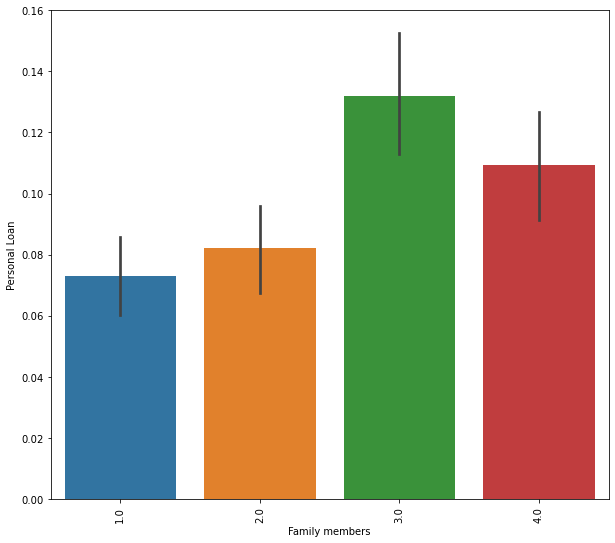

In [46]:
plt.figure(figsize=(10,9))
sns.barplot(x=df1['Family members'],y=df1['Personal Loan'])
plt.xticks(rotation=90)
plt.show()

In [47]:
# Checking the relationship between 1 Family members and Personal Loan

df1[(df1['Family members']==1) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
9       10              34                      9                  180   
29      30              38                     13                  119   
199    200              36                     11                  158   
299    300              41                     15                  159   
316    317              57                     31                  165   
...    ...             ...                    ...                  ...   
4627  4628              27                      1                  134   
4763  4764              51                     25                  173   
4859  4860              34                      8                  165   
4876  4877              44                     19                  142   
4927  4928              43                     19                  121   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
9        93023             1.0    8.9          3         0              1   
29       94104             1.0    3.3          2         0              1   
199      92152             1.0    5.1          3         0              1   
299      90057             1.0    5.5          3         0              1   
316      95054             1.0    1.6          2         0              1   
...        ...             ...    ...        ...       ...            ...   
4627     93106             1.0    1.7          2       307              1   
4763     95051             1.0    0.5          2         0              1   
4859     91107             1.0    7.0          3       541              1   
4876     95054             1.0    1.5          3         0              1   
4927     94720             1.0    0.7          2         0              1   

      Securities Account  CD Account  Online  CreditCard  
9                      0           0       0           0  
29                     0           1       1           1  
199                    0           1       1           1  
299                    0           1       1           0  
316                    0           0       1           0  
...                  ...         ...     ...         ...  
4627                   0           0       1           0  
4763                   0           0       1           0  
4859                   0           0       0           0  
4876                   0           0       0           0  
4927                   0           1       1           1  

[108 rows x 14 columns]

In [48]:
# Checking the relationship between 2 Family members and Personal Loan

df1[(df1['Family members']==2) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
18      19              46                     21                  193   
57      58              56                     31                  131   
78      79              54                     30                  133   
174    175              42                     17                  168   
251    252              54                     28                  170   
...    ...             ...                    ...                  ...   
4655  4656              33                      7                  188   
4702  4703              35                      5                  108   
4811  4812              36                     12                  123   
4823  4824              46                     21                  115   
4941  4942              28                      4                  112   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
18       91604             2.0   8.10          3         0              1   
57       95616             2.0   1.20          3         0              1   
78       93305             2.0   2.60          3         0              1   
174      95503             2.0   7.90          2         0              1   
251      92182             2.0   6.20          2       325              1   
...        ...             ...    ...        ...       ...            ...   
4655     95054             2.0   7.00          2       581              1   
4702     90630             2.0   2.75          3         0              1   
4811     90502             2.0   3.00          3         0              1   
4823     95616             2.0   4.20          3         0              1   
4941     90049             2.0   1.60          2         0              1   

      Securities Account  CD Account  Online  CreditCard  
18                     0           0       0           0  
57                     0           0       0           0  
78                     0           0       0           0  
174                    0           0       1           0  
251                    0           0       1           0  
...                  ...         ...     ...         ...  
4655                   0           0       0           0  
4702                   1           0       0           0  
4811                   0           0       0           0  
4823                   1           1       1           1  
4941                   0           0       1           0  

[106 rows x 14 columns]

In [49]:
# Checking the relationship with Family members equal to 3 and Personal Loan

df1[(df1['Family members']==3) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
38      39              42                     18                  141   
53      54              50                     26                  190   
151    152              26                      0                  132   
183    184              29                      3                  148   
187    188              46                     21                  159   
...    ...             ...                    ...                  ...   
4842  4843              49                     23                  174   
4846  4847              35                     10                  135   
4883  4884              38                     13                  129   
4962  4963              46                     20                  122   
4980  4981              29                      5                  135   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
38       94114             3.0    5.0          3         0              1   
53       90245             3.0    2.1          3       240              1   
151      92834             3.0    6.5          3         0              1   
183      92173             3.0    4.1          1         0              1   
187      94305             3.0    1.9          3       315              1   
...        ...             ...    ...        ...       ...            ...   
4842     95449             3.0    4.6          2       590              1   
4846     94596             3.0    4.8          2         0              1   
4883     92646             3.0    4.1          3         0              1   
4962     90065             3.0    3.0          3         0              1   
4980     95762             3.0    5.3          1         0              1   

      Securities Account  CD Account  Online  CreditCard  
38                     1           1       1           0  
53                     0           0       1           0  
151                    0           0       0           1  
183                    0           0       1           0  
187                    0           0       1           0  
...                  ...         ...     ...         ...  
4842                   0           0       0           0  
4846                   0           0       1           0  
4883                   0           1       1           1  
4962                   0           1       1           1  
4980                   0           1       1           1  

[133 rows x 14 columns]

In [50]:
# Checking the relationship with Family Member equal to 4 and Personal Loan
 
df1[(df1['Family members']==4) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
16      17              38                     14                  130   
42      43              32                      7                  132   
47      48              37                     12                  194   
75      76              31                      7                  135   
90      91              55                     30                  118   
...    ...             ...                    ...                  ...   
4631  4632              32                      8                  142   
4642  4643              65                     40                  143   
4719  4720              32                      8                  140   
4812  4813              29                      4                  184   
4865  4866              50                     24                  133   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
16       95010             4.0    4.7          3       134              1   
42       90019             4.0    1.1          2       412              1   
47       91380             4.0    0.2          3       211              1   
75       94901             4.0    3.8          2         0              1   
90       90277             4.0    5.6          2         0              1   
...        ...             ...    ...        ...       ...            ...   
4631     90095             4.0    6.2          2       120              1   
4642     95616             4.0    6.6          2         0              1   
4719     94102             4.0    6.6          3         0              1   
4812     92126             4.0    2.2          3       612              1   
4865     90025             4.0    1.4          2       342              1   

      Securities Account  CD Account  Online  CreditCard  
16                     0           0       0           0  
42                     0           0       1           0  
47                     1           1       1           1  
75                     0           1       1           1  
90                     0           0       1           0  
...                  ...         ...     ...         ...  
4631                   0           1       1           1  
4642                   0           0       1           0  
4719                   0           1       0           1  
4812                   0           0       1           0  
4865                   0           0       0           1  

[133 rows x 14 columns]

In [51]:
df1[df1['Family members']>4]

Empty DataFrame
Columns: [ID, Age (in years), Experience (in years), Income (in K/month), ZIP Code, Family members, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

# Does Average Spending on Credit Card(CCAvg) increase the chance of Customer Selling Personal Loan?

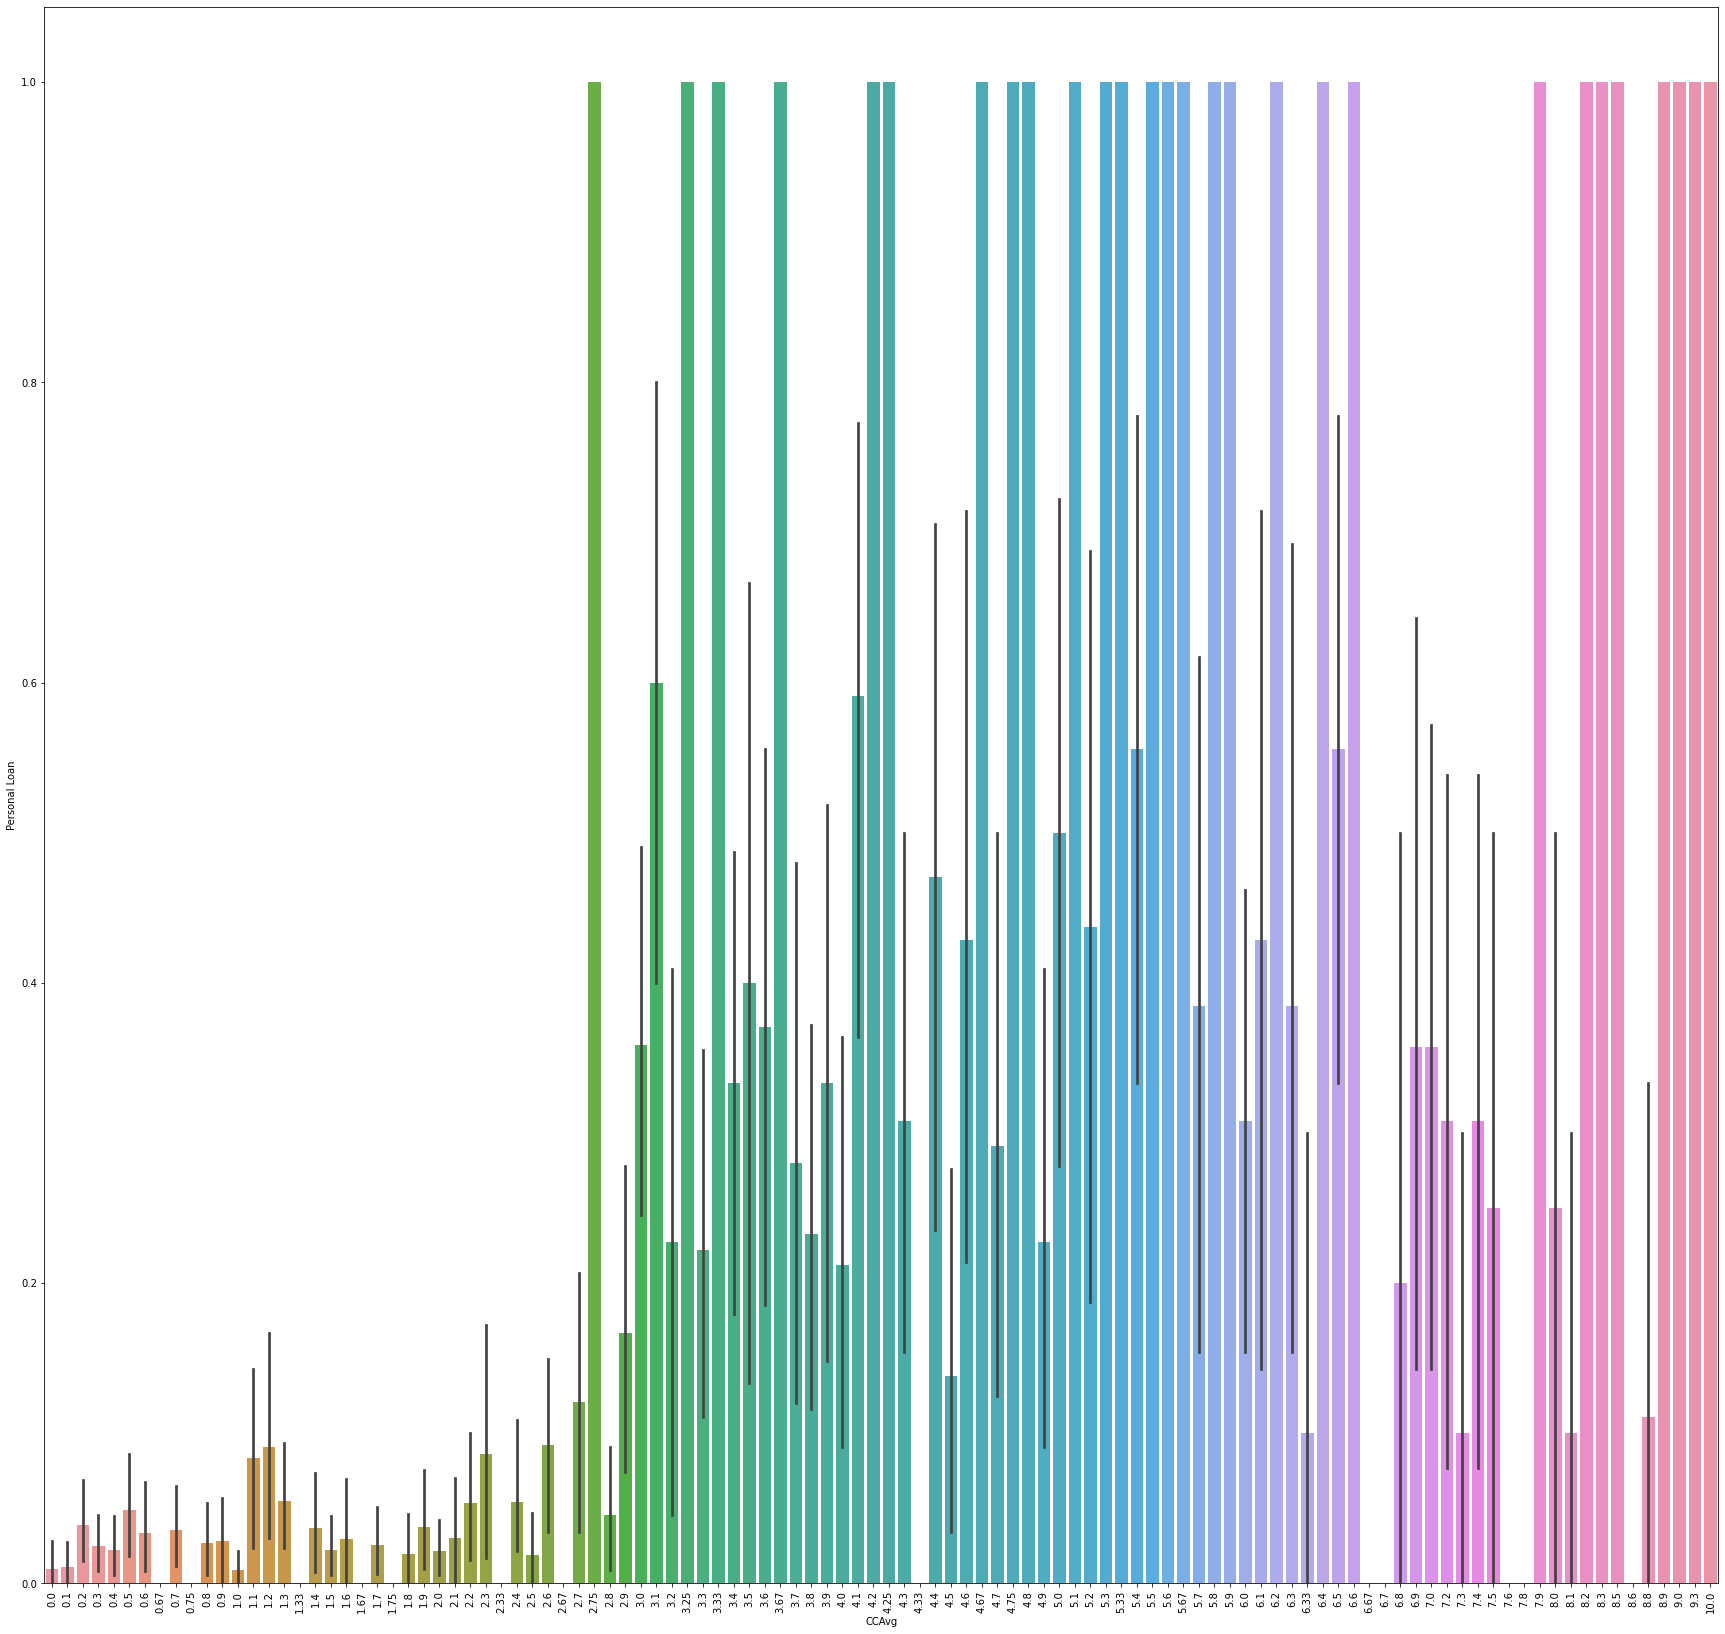

In [52]:
# Checking the Relationship between CCAvg and PersonalLoan
#df2=df1[df1['CCAvg']>3]
fig=plt.figure(figsize=(30,29))
sns.barplot(x=df1['CCAvg'],y=df1['Personal Loan'])
plt.xticks(rotation=90)
plt.show()

In [53]:
# Checking the Anomalies in CCAvg Columns

df1[df1['CCAvg']<0]

Empty DataFrame
Columns: [ID, Age (in years), Experience (in years), Income (in K/month), ZIP Code, Family members, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [54]:
# Checking the unique category in the columns(CCAvg)
df1['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [55]:
# CCAvg between 0 and 2.5 with Personal Loan

df1[(df1['CCAvg']>0) & (df1['CCAvg']<=2.5) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
42      43              32                      7                  132   
47      48              37                     12                  194   
53      54              50                     26                  190   
57      58              56                     31                  131   
187    188              46                     21                  159   
...    ...             ...                    ...                  ...   
4812  4813              29                      4                  184   
4865  4866              50                     24                  133   
4876  4877              44                     19                  142   
4927  4928              43                     19                  121   
4941  4942              28                      4                  112   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
42       90019             4.0    1.1          2       412              1   
47       91380             4.0    0.2          3       211              1   
53       90245             3.0    2.1          3       240              1   
57       95616             2.0    1.2          3         0              1   
187      94305             3.0    1.9          3       315              1   
...        ...             ...    ...        ...       ...            ...   
4812     92126             4.0    2.2          3       612              1   
4865     90025             4.0    1.4          2       342              1   
4876     95054             1.0    1.5          3         0              1   
4927     94720             1.0    0.7          2         0              1   
4941     90049             2.0    1.6          2         0              1   

      Securities Account  CD Account  Online  CreditCard  
42                     0           0       1           0  
47                     1           1       1           1  
53                     0           0       1           0  
57                     0           0       0           0  
187                    0           0       1           0  
...                  ...         ...     ...         ...  
4812                   0           0       1           0  
4865                   0           0       0           1  
4876                   0           0       0           0  
4927                   0           1       1           1  
4941                   0           0       1           0  

[117 rows x 14 columns]

In [56]:
#CCAvg between 2.5 and 5 with Personal Loan

df1[(df1['CCAvg']>2.5) & (df1['CCAvg']<=5) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
16      17              38                     14                  130   
29      30              38                     13                  119   
38      39              42                     18                  141   
75      76              31                      7                  135   
78      79              54                     30                  133   
...    ...             ...                    ...                  ...   
4823  4824              46                     21                  115   
4842  4843              49                     23                  174   
4846  4847              35                     10                  135   
4883  4884              38                     13                  129   
4962  4963              46                     20                  122   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
16       95010             4.0    4.7          3       134              1   
29       94104             1.0    3.3          2         0              1   
38       94114             3.0    5.0          3         0              1   
75       94901             4.0    3.8          2         0              1   
78       93305             2.0    2.6          3         0              1   
...        ...             ...    ...        ...       ...            ...   
4823     95616             2.0    4.2          3         0              1   
4842     95449             3.0    4.6          2       590              1   
4846     94596             3.0    4.8          2         0              1   
4883     92646             3.0    4.1          3         0              1   
4962     90065             3.0    3.0          3         0              1   

      Securities Account  CD Account  Online  CreditCard  
16                     0           0       0           0  
29                     0           1       1           1  
38                     1           1       1           0  
75                     0           1       1           1  
78                     0           0       0           0  
...                  ...         ...     ...         ...  
4823                   1           1       1           1  
4842                   0           0       0           0  
4846                   0           0       1           0  
4883                   0           1       1           1  
4962                   0           1       1           1  

[224 rows x 14 columns]

In [57]:
## CCAvg between  5 and 7.5 with Personal Loan

df1[(df1['CCAvg']>5) & (df1['CCAvg']<=7.5) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
90      91              55                     30                  118   
131    132              58                     34                  149   
151    152              26                      0                  132   
160    161              29                      0                  134   
199    200              36                     11                  158   
...    ...             ...                    ...                  ...   
4642  4643              65                     40                  143   
4655  4656              33                      7                  188   
4719  4720              32                      8                  140   
4859  4860              34                      8                  165   
4980  4981              29                      5                  135   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
90       90277             4.0    5.6          2         0              1   
131      93720             4.0    7.2          2         0              1   
151      92834             3.0    6.5          3         0              1   
160      95819             4.0    6.5          3         0              1   
199      92152             1.0    5.1          3         0              1   
...        ...             ...    ...        ...       ...            ...   
4642     95616             4.0    6.6          2         0              1   
4655     95054             2.0    7.0          2       581              1   
4719     94102             4.0    6.6          3         0              1   
4859     91107             1.0    7.0          3       541              1   
4980     95762             3.0    5.3          1         0              1   

      Securities Account  CD Account  Online  CreditCard  
90                     0           0       1           0  
131                    0           1       1           1  
151                    0           0       0           1  
160                    0           0       0           0  
199                    0           1       1           1  
...                  ...         ...     ...         ...  
4642                   0           0       1           0  
4655                   0           0       0           0  
4719                   0           1       0           1  
4859                   0           0       0           0  
4980                   0           1       1           1  

[117 rows x 14 columns]

In [58]:
## CCAvg between 7.5 and 10 with Personal Loan

df1[(df1['CCAvg']>7.5) & (df1['CCAvg']<=10) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
9       10              34                      9                  180   
18      19              46                     21                  193   
174    175              42                     17                  168   
243    244              65                     39                  170   
462    463              29                      4                  183   
787    788              45                     15                  202   
1339  1340              52                     25                  180   
1824  1825              49                     23                  194   
2041  2042              45                     20                  180   
2046  2047              43                     16                  161   
2077  2078              34                      9                  160   
2101  2102              35                      5                  203   
2337  2338              43                     16                  201   
2593  2594              48                     23                  161   
2769  2770              33                      9                  183   
2773  2774              63                     37                  185   
2812  2813              53                     28                  183   
3822  3823              63                     33                  178   
3943  3944              61                     36                  188   
4414  4415              33                      8                  178   
4652  4653              38                     12                  184   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
9        93023             1.0    8.9          3         0              1   
18       91604             2.0    8.1          3         0              1   
174      95503             2.0    7.9          2         0              1   
243      90095             3.0    7.9          3        99              1   
462      91423             3.0    8.3          3         0              1   
787      91380             3.0   10.0          3         0              1   
1339     94545             2.0    9.0          2       297              1   
1824     94022             4.0    8.3          2         0              1   
2041     95403             3.0    8.5          2       535              1   
2046     95134             3.0    8.0          2         0              1   
2077     94108             4.0    8.0          3         0              1   
2101     95032             1.0   10.0          3         0              1   
2337     95054             1.0   10.0          2         0              1   
2593     96003             4.0    7.9          3       310              1   
2769     91320             2.0    8.8          3       582              1   
2773     94309             2.0    7.9          2       358              1   
2812     96008             3.0    8.2          3       467              1   
3822     91768             4.0    9.0          3         0              1   
3943     91360             1.0    9.3          2         0              1   
4414     94720             3.0    8.5          1         0              1   
4652     91311             3.0    8.0          1         0              1   

      Securities Account  CD Account  Online  CreditCard  
9                      0           0       0           0  
18                     0           0       0           0  
174                    0           0       1           0  
243                    0           1       1           0  
462                    0           0       1           0  
787                    0           0       0           0  
1339                   0           0       1           0  
1824                   0           0       0           1  
2041                   0           0       0           0  
2046                   0           1       1           1  
2077                   0           

In [59]:
## CCAvg between  10 and Higher 

df1[(df1['CCAvg']>10) & (df1['Personal Loan']==1)]

Empty DataFrame
Columns: [ID, Age (in years), Experience (in years), Income (in K/month), ZIP Code, Family members, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

# Does Education Level impacts the buying of Personal Loan?

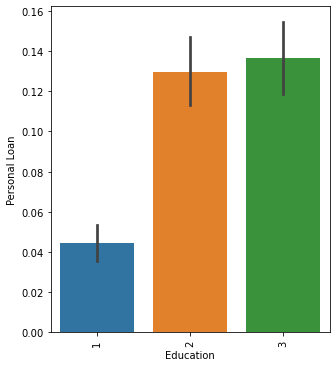

In [60]:
fig=plt.figure(figsize=(5,6))
sns.barplot(x=df1['Education'],y=df1['Personal Loan'])
plt.xticks(rotation=90)
plt.show()

# Does Value of Mortgage has any impacts on personal loan?

In [61]:
df1['Mortgage'].value_counts()

0      3462
98       17
119      16
89       16
91       16
       ... 
547       1
458       1
505       1
361       1
541       1
Name: Mortgage, Length: 347, dtype: int64

In [62]:
# The Person without Mortgage 

df1[(df1['Mortgage']==0) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
9       10              34                      9                  180   
18      19              46                     21                  193   
29      30              38                     13                  119   
38      39              42                     18                  141   
57      58              56                     31                  131   
...    ...             ...                    ...                  ...   
4883  4884              38                     13                  129   
4927  4928              43                     19                  121   
4941  4942              28                      4                  112   
4962  4963              46                     20                  122   
4980  4981              29                      5                  135   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
9        93023             1.0    8.9          3         0              1   
18       91604             2.0    8.1          3         0              1   
29       94104             1.0    3.3          2         0              1   
38       94114             3.0    5.0          3         0              1   
57       95616             2.0    1.2          3         0              1   
...        ...             ...    ...        ...       ...            ...   
4883     92646             3.0    4.1          3         0              1   
4927     94720             1.0    0.7          2         0              1   
4941     90049             2.0    1.6          2         0              1   
4962     90065             3.0    3.0          3         0              1   
4980     95762             3.0    5.3          1         0              1   

      Securities Account  CD Account  Online  CreditCard  
9                      0           0       0           0  
18                     0           0       0           0  
29                     0           1       1           1  
38                     1           1       1           0  
57                     0           0       0           0  
...                  ...         ...     ...         ...  
4883                   0           1       1           1  
4927                   0           1       1           1  
4941                   0           0       1           0  
4962                   0           1       1           1  
4980                   0           1       1           1  

[312 rows x 14 columns]

In [63]:
# Mortgage between 0 and 50 with Personal Loan
df1[(df1['Mortgage']>0) &  (df1['Mortgage']<=50) & (df1['Personal Loan']==1)]

Empty DataFrame
Columns: [ID, Age (in years), Experience (in years), Income (in K/month), ZIP Code, Family members, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [64]:
# Mortgage between 50 and 100 with Personal Loan
df1[(df1['Mortgage']>50) &  (df1['Mortgage']<=100) & df1['Personal Loan']==1]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
243    244              65                     39                  170   
321    322              44                     20                  101   
482    483              56                     32                  173   
776    777              50                     26                  135   
1062  1063              47                     21                   83   
1244  1245              33                      8                  130   
1603  1604              36                      6                  138   
1768  1769              43                     18                  128   
1822  1823              48                     23                  112   
3498  3499              30                      6                  182   
3668  3669              38                     13                  129   
4565  4566              33                      8                  120   
4625  4626              45                     21                  102   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
243      90095             3.0    7.9          3        99              1   
321      92717             3.0    4.4          2        82              1   
482      94022             1.0    4.6          2        88              1   
776      92121             2.0    4.6          3        91              1   
1062     92220             1.0    3.8          1        97              1   
1244     94720             3.0    6.3          2        99              1   
1603     92152             1.0    7.0          3        86              1   
1768     92093             4.0    5.3          1        84              1   
1822     93014             1.0    5.1          2        86              1   
3498     93561             4.0    0.8          3        94              1   
3668     92037             4.0    0.3          3        75              1   
4565     92614             2.0    4.2          3        76              1   
4625     92037             4.0    4.7          2        81              1   

      Securities Account  CD Account  Online  CreditCard  
243                    0           1       1           0  
321                    0           0       0           0  
482                    0           1       1           0  
776                    0           0       1           0  
1062                   0           0       0           0  
1244                   0           0       0           1  
1603                   0           0       1           0  
1768                   0           0       0           0  
1822                   1           1       1           0  
3498                   0           0       1           0  
3668                   0           0       1           0  
4565                   0           0       0           1  
4625                   0           0       0           0

In [65]:
# Mortgage between 100 and 200 with Personal Loan
df1[(df1['Mortgage']>100) &  (df1['Mortgage']<=200) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
16      17              38                     14                  130   
247    248              53                     29                  120   
254    255              65                     41                  134   
349    350              26                      2                   60   
438    439              58                     32                  113   
442    443              58                     28                  122   
650    651              47                     22                  122   
859    860              63                     37                  124   
927    928              65                     40                   95   
941    942              38                     13                  129   
1097  1098              50                     24                  188   
1177  1178              28                      3                   71   
1204  1205              26                      1                  190   
1411  1412              65                     39                  184   
1495  1496              52                     28                  178   
1559  1560              59                     35                  102   
1659  1660              33                      7                  139   
1860  1861              30                      6                  179   
1913  1914              57                     33                  134   
2014  2015              49                     19                  169   
2061  2062              63                     38                  159   
2207  2208              38                     12                  180   
2328  2329              27                      2                  130   
2400  2401              61                     36                  169   
2490  2491              52                     28                  168   
2539  2540              32                      7                   98   
2561  2562              31                      5                  180   
2646  2647              45                     20                  191   
2898  2899              27                      1                  140   
3006  3007              62                     37                  169   
3154  3155              27                      1                   99   
3217  3218              65                     39                   94   
3517  3518              30                      6                   95   
3728  3729              28                      3                  118   
4020  4021              58                     32                  191   
4165  4166              63                     38                  135   
4418  4419              59                     34                  145   
4631  4632              32                      8                  142   
4790  4791              35                     11                  101   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
16       95010             4.0   4.70          3       134              1   
247      92626             4.0   2.70          2       111              1   
254      91942             3.0   3.90          3       121              1   
349      93407             2.0   3.00          1       132              1   
438      93943             2.0   3.80          2       119              1   
442      95136             1.0   3.00          3       115              1   
650      90037             1.0   5.10          3       163              1   
859      92182             3.0   5.00          2       170              1   
927      95014             3.0   3.70          2       138              1   
941      92093             4.0   4.40          1       140              1   
1097     92007             3.0   1.30          1       184              1   
1177     90405             1.0   3.30          2       149              1   
1204     91604             4.0   1.30         

In [66]:
# Mortgage between 200 and 300 with Personal Loan
df1[(df1['Mortgage']>200) &  (df1['Mortgage']<=300) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
47      48              37                     12                  194   
53      54              50                     26                  190   
209    210              64                     39                  172   
261    262              42                     16                  111   
671    672              65                     41                  105   
896    897              50                     24                  161   
940    941              61                     36                  193   
954    955              37                     12                  169   
971    972              43                     19                  174   
1050  1051              53                     27                  145   
1105  1106              35                     10                  182   
1292  1293              56                     30                  164   
1339  1340              52                     25                  180   
1407  1408              63                     39                  101   
1478  1479              65                     39                  160   
1518  1519              43                     17                   64   
1577  1578              34                      8                   65   
1918  1919              39                      9                  118   
2159  2160              61                     35                   99   
2246  2247              35                     11                  190   
2345  2346              65                     40                   89   
2613  2614              52                     26                  110   
2856  2857              36                     10                  172   
2859  2860              35                     11                  188   
3033  3034              43                     19                  130   
3288  3289              56                     30                  140   
3383  3384              46                     22                  135   
3541  3542              45                     20                  144   
3562  3563              32                      8                  169   
3578  3579              29                      5                  128   
3646  3647              34                      9                  141   
3720  3721              63                     39                  131   
3821  3822              35                      9                  188   
3858  3859              42                     18                  158   
3948  3949              37                     12                  123   
4169  4170              41                     17                  143   
4190  4191              40                     16                   89   
4259  4260              52                     26                  158   
4292  4293              63                     37                  191   
4301  4302              49                     24                  130   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
47       91380             4.0    0.2          3       211              1   
53       90245             3.0    2.1          3       240              1   
209      94707             4.0    3.1          1       282              1   
261      93106             2.0    1.2          3       251              1   
671      92612             1.0    3.0          2       282              1   
896      95133             3.0    3.4          1       212              1   
940      94303             1.0    4.7          3       203              1   
954      91107             2.0    5.2          3       249              1   
971      92028             3.0    1.7          3       231              1   
1050     90095             2.0    6.1          3       294              1   
1105     95051             1.0    0.3          2       229              1   
1292     94610             4.0    0.5          2 

In [67]:
# Mortgage between 300 and 500 with Personal Loan
df1[(df1['Mortgage']>300) &  (df1['Mortgage']<=500) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
42      43              32                      7                  132   
187    188              46                     21                  159   
251    252              54                     28                  170   
288    289              44                     19                  172   
365    366              57                     32                  174   
528    529              64                     39                  122   
570    571              49                     25                  161   
805    806              55                     29                  132   
888    889              57                     33                  182   
891    892              32                      6                  120   
1007  1008              44                     19                   99   
1014  1015              50                     26                  192   
1077  1078              29                      3                  175   
1164  1165              41                     17                   94   
1273  1274              60                     35                  130   
1328  1329              60                     36                  145   
1372  1373              39                     13                  139   
1395  1396              47                     23                  190   
1582  1583              43                     19                  170   
1583  1584              61                     36                  184   
1674  1675              37                     11                  139   
1882  1883              56                     32                  125   
1889  1890              56                     30                  111   
2002  2003              30                      4                  142   
2087  2088              51                     27                  188   
2217  2218              48                     24                  162   
2317  2318              31                      5                  129   
2382  2383              46                     20                  185   
2428  2429              39                     12                  108   
2443  2444              28                      3                  161   
2590  2591              46                     20                  152   
2593  2594              48                     23                  161   
2664  2665              54                     29                  154   
2714  2715              46                     20                  158   
2753  2754              54                     27                  195   
2773  2774              63                     37                  185   
2812  2813              53                     28                  183   
2885  2886              57                     31                  113   
2968  2969              44                     18                  162   
3209  3210              42                     16                  173   
3339  3340              27                      1                  141   
3373  3374              28                      2                  182   
3467  3468              63                     37                  149   
3472  3473              54                     27                  120   
3571  3572              42                     18                  153   
3612  3613              50                     25                   99   
3702  3703              50                     25                  160   
3766  3767              59                     35                  108   
3776  3777              27                      3                  135   
3919  3920              64                     34                  179   
3945  3946              29                      3                  123   
4008  4009              61                     31                  154   
4016  4017              53                     28                  173   
4023  4024  

In [68]:
# Mortgage value greater than 500 with Personal Loan
df1[(df1['Mortgage']>500) & (df1['Personal Loan']==1)]

ID  Age (in years)  Experience (in years)  Income (in K/month)  \
303    304              49                     25                  195   
473    474              64                     39                  182   
782    783              54                     30                  194   
1789  1790              44                     20                  171   
1937  1938              51                     25                  181   
2041  2042              45                     20                  180   
2541  2542              34                      8                  171   
2769  2770              33                      9                  183   
2841  2842              37                     11                  190   
2956  2957              62                     38                  195   
4345  4346              26                      1                  184   
4585  4586              35                     11                  180   
4655  4656              33                      7                  188   
4812  4813              29                      4                  184   
4842  4843              49                     23                  174   
4859  4860              34                      8                  165   

      ZIP Code  Family members  CCAvg  Education  Mortgage  Personal Loan  \
303      95605             4.0    3.0          1       617              1   
473      93955             1.0    1.2          2       547              1   
782      92056             3.0    6.0          3       587              1   
1789     91330             4.0    0.7          1       567              1   
1937     95051             1.0    3.3          3       589              1   
2041     95403             3.0    8.5          2       535              1   
2541     90212             2.0    2.2          2       569              1   
2769     91320             2.0    8.8          3       582              1   
2841     94305             4.0    7.3          2       565              1   
2956     91125             4.0    5.2          3       522              1   
4345     94608             2.0    4.2          3       577              1   
4585     94010             1.0    3.6          3       571              1   
4655     95054             2.0    7.0          2       581              1   
4812     92126             4.0    2.2          3       612              1   
4842     95449             3.0    4.6          2       590              1   
4859     91107             1.0    7.0          3       541              1   

      Securities Account  CD Account  Online  CreditCard  
303                    0           0       0           0  
473                    0           0       1           0  
782                    1           1       1           1  
1789                   0           1       1           1  
1937                   1           1       1           0  
2041                   0           0       0           0  
2541                   0           0       1           0  
2769                   0           0       1           0  
2841                   0           1       1           0  
2956                   0           1       1           1  
4345                   0           1       1           1  
4585                   0           1       1           1  
4655                   0           0       0           0  
4812                   0           0       1           0  
4842                   0           0       0           0  
4859                   0           0       0           0

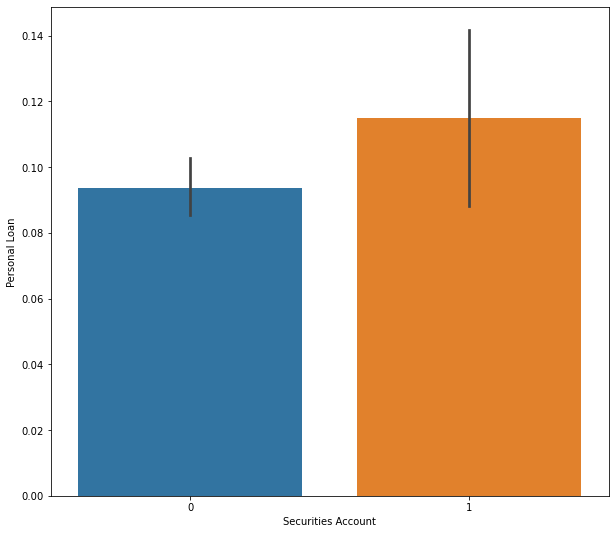

In [69]:
# Checking the relationship between Securities Account and Personal Loan

plt.figure(figsize=(10,9))
sns.barplot(x=df1['Securities Account'],y=df1['Personal Loan'])
plt.show()

# Does having CD Account will increase the chance of buying personal loan?

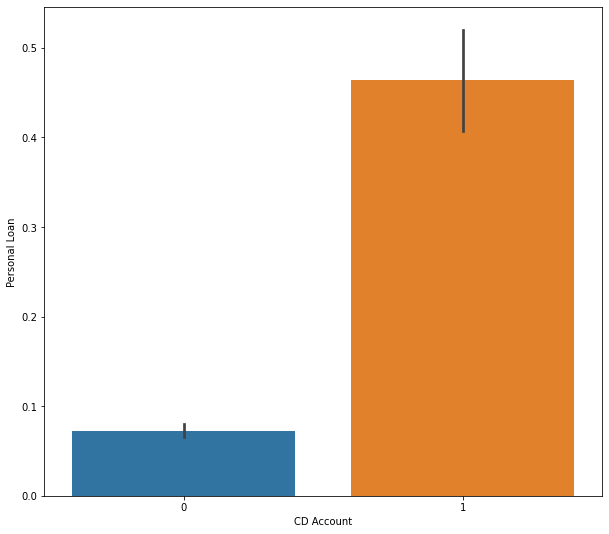

In [70]:
# Checking the relationship between Age( in Years) with Family members and Personal Loan
fig=plt.figure(figsize=(10,9))
sns.barplot(x='CD Account',y='Personal Loan',data=df1)
plt.show()

Having CD Account Holder increase the chance of buying the personal loan

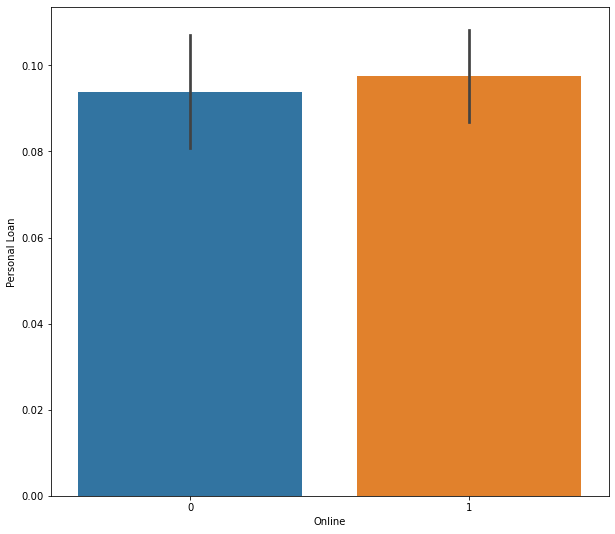

In [71]:
# Checking the relationship between Online Services and Personal Loan
fig=plt.figure(figsize=(10,9))
sns.barplot(x='Online',y='Personal Loan',data=df1)
plt.show()

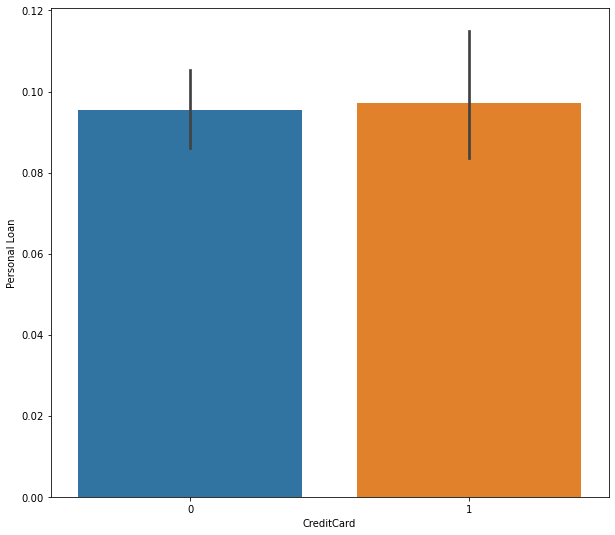

In [72]:
# Checking the relationship between Online Services and Personal Loan
fig=plt.figure(figsize=(10,9))
sns.barplot(x='CreditCard',y='Personal Loan',data=df1)
plt.show()

# Checking Multiple relationship between Variable so that we can understand it much better 

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age (in years)         5000 non-null   int64  
 2   Experience (in years)  5000 non-null   int64  
 3   Income (in K/month)    5000 non-null   int64  
 4   ZIP Code               5000 non-null   int64  
 5   Family members         5000 non-null   float64
 6   CCAvg                  5000 non-null   float64
 7   Education              5000 non-null   int64  
 8   Mortgage               5000 non-null   int64  
 9   Personal Loan          5000 non-null   int64  
 10  Securities Account     5000 non-null   int64  
 11  CD Account             5000 non-null   int64  
 12  Online                 5000 non-null   int64  
 13  CreditCard             5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


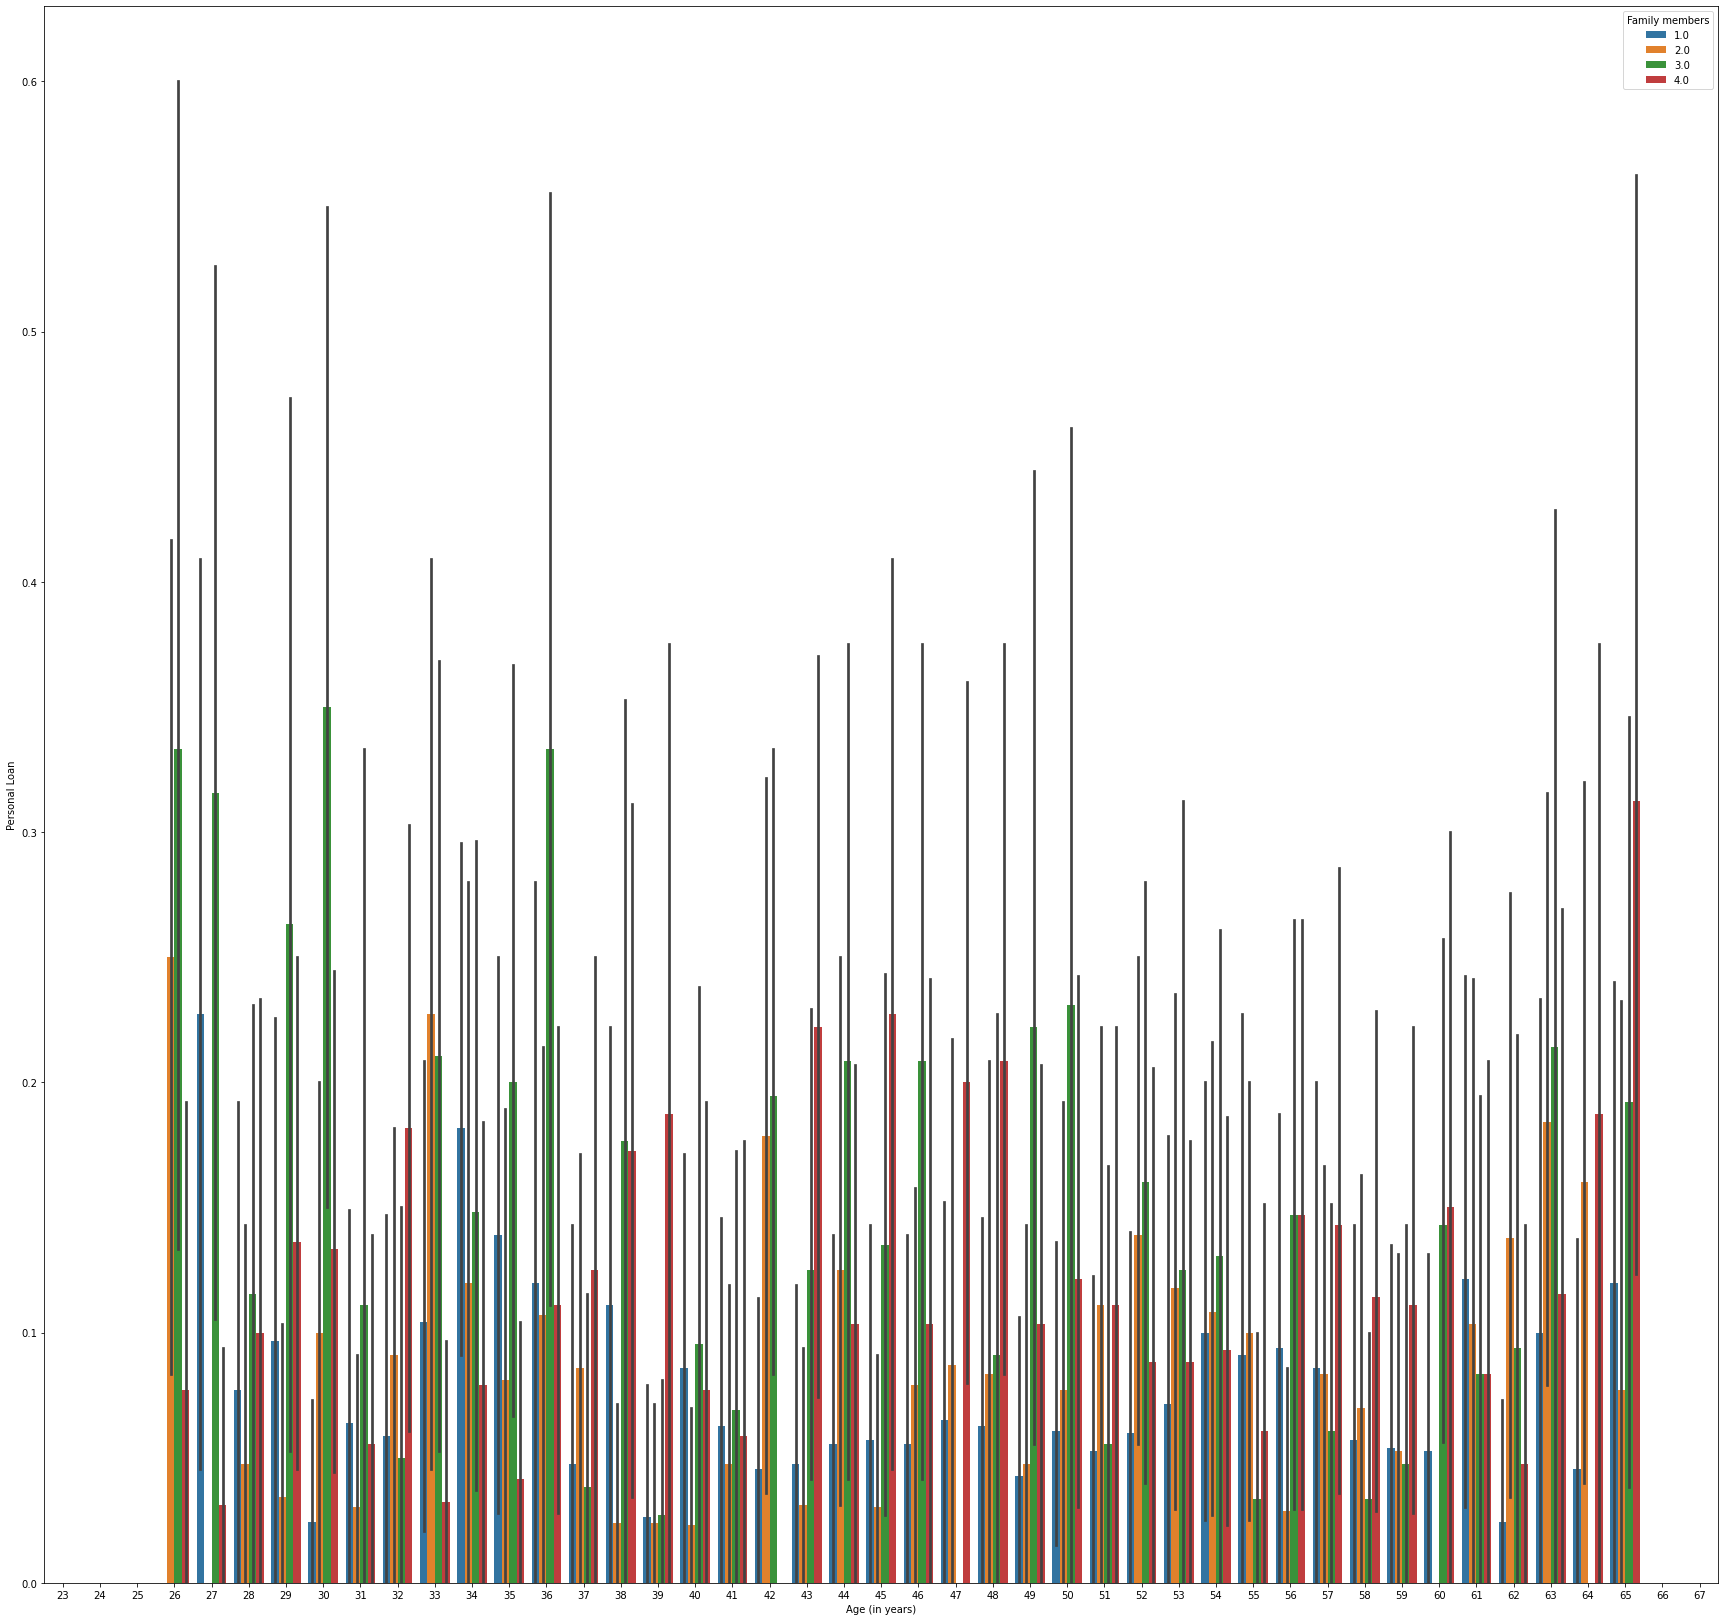

In [74]:
# Checking the relationship between Age (in years) and Family members with respect to Personal Loan
fig=plt.figure(figsize=(30,29))
sns.barplot(x='Age (in years)',y='Personal Loan',hue='Family members',data=df1)
plt.show()

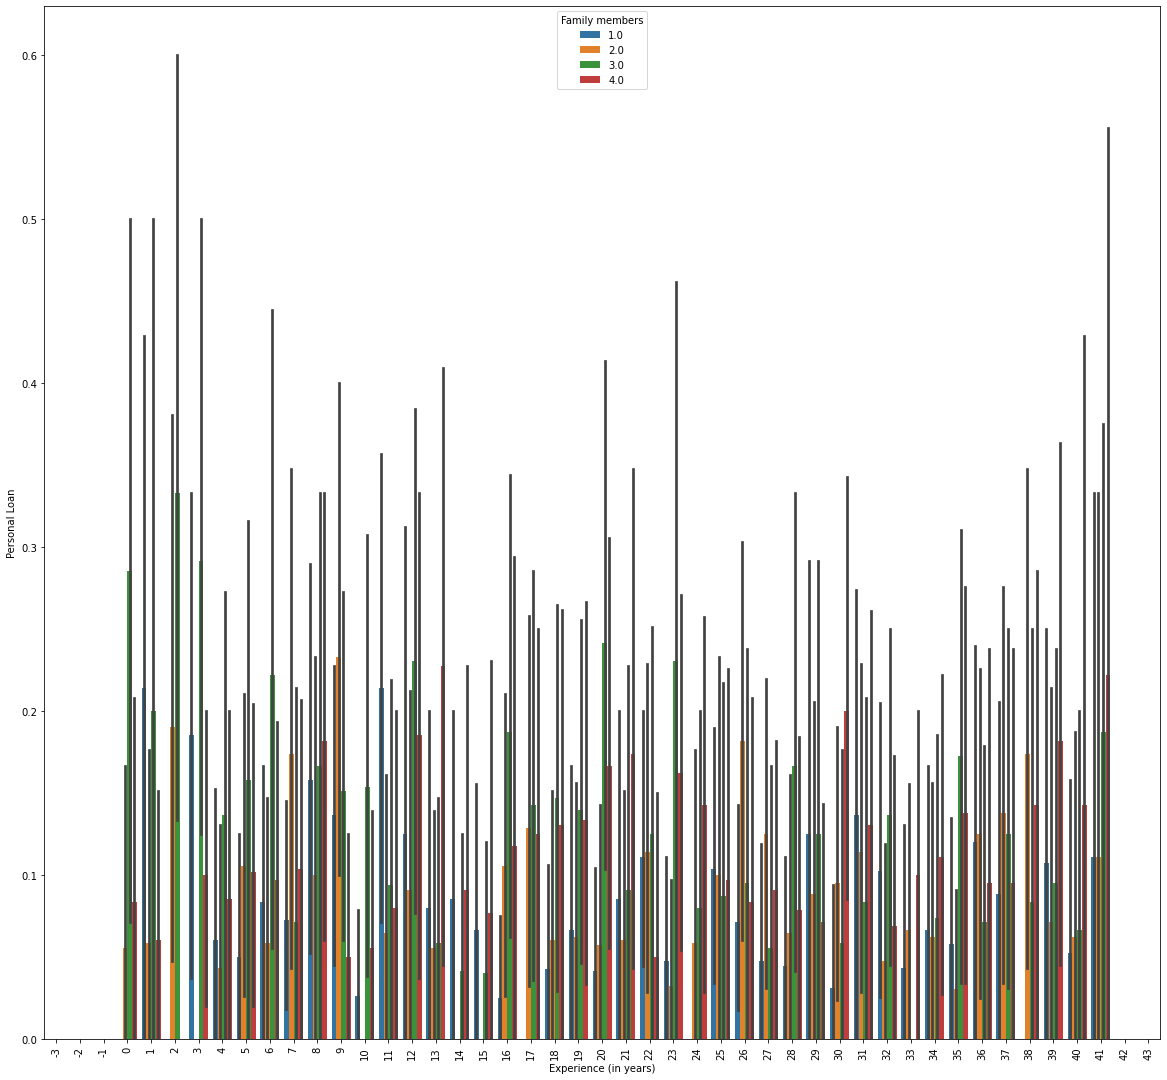

In [75]:
# Checking the relationship between Experience,Family Members and Personal Loan

fig=plt.figure(figsize=(20,19))
sns.barplot(x=df1['Experience (in years)'],y=df1['Personal Loan'],hue=df1['Family members'])
plt.xticks(rotation=90)
plt.show()

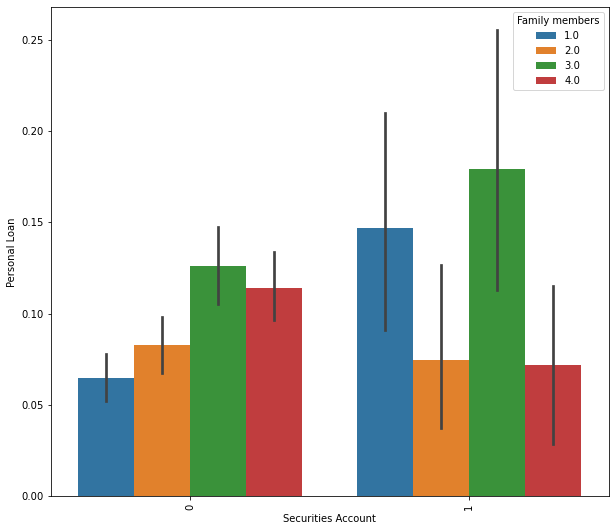

In [76]:
# Checking the relationship between Securities Account and Personal Loan with respect to Family Members
fig=plt.figure(figsize=(10,9))
sns.barplot(x=df1['Securities Account'],y=df1['Personal Loan'],hue=df1['Family members'])
plt.xticks(rotation=90)
plt.show()

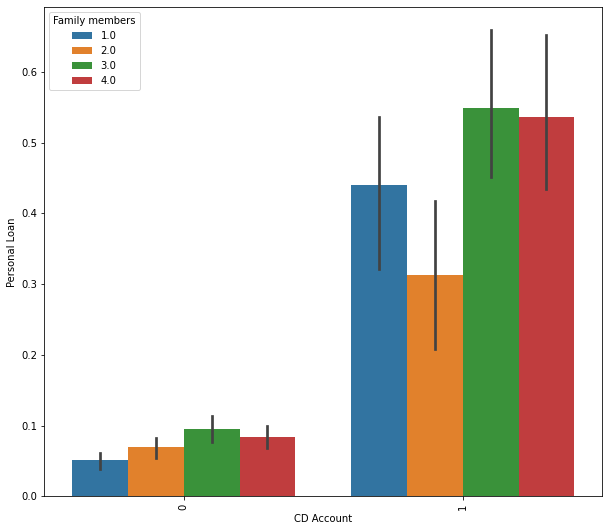

In [77]:
# Checking the relationship between CD Account and Personal Loan with respect to Family Members
fig=plt.figure(figsize=(10,9))
sns.barplot(x=df1['CD Account'],y=df1['Personal Loan'],hue=df1['Family members'])
plt.xticks(rotation=90)
plt.show()

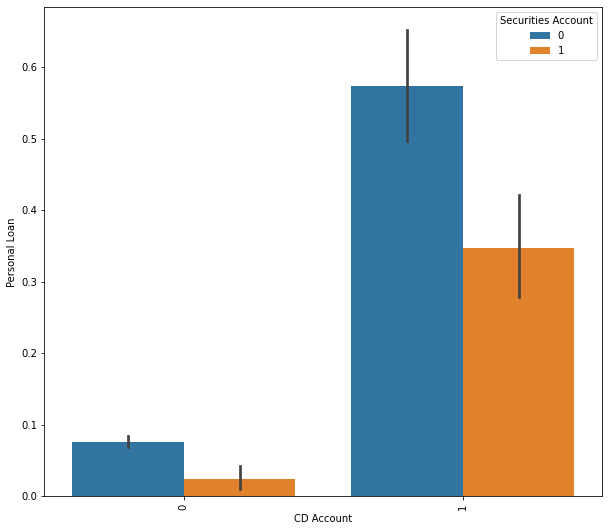

In [78]:
# Checking the relationship between CD Account and Securities Account with respect to Personal Loan
fig=plt.figure(figsize=(10,9))
sns.barplot(x=df1['CD Account'],y=df1['Personal Loan'],hue=df1['Securities Account'])
plt.xticks(rotation=90)
plt.show()

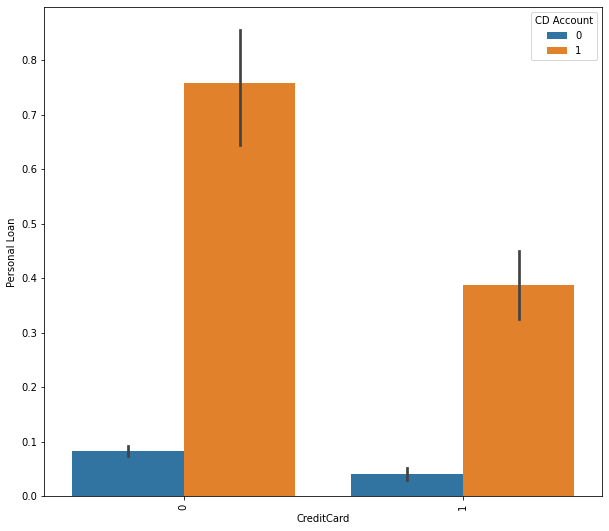

In [79]:
# Checking the relationship between Credit Card and CD Account with respect to Personal Loan
fig=plt.figure(figsize=(10,9))
sns.barplot(x=df1['CreditCard'],y=df1['Personal Loan'],hue=df1['CD Account'])
plt.xticks(rotation=90)
plt.show()

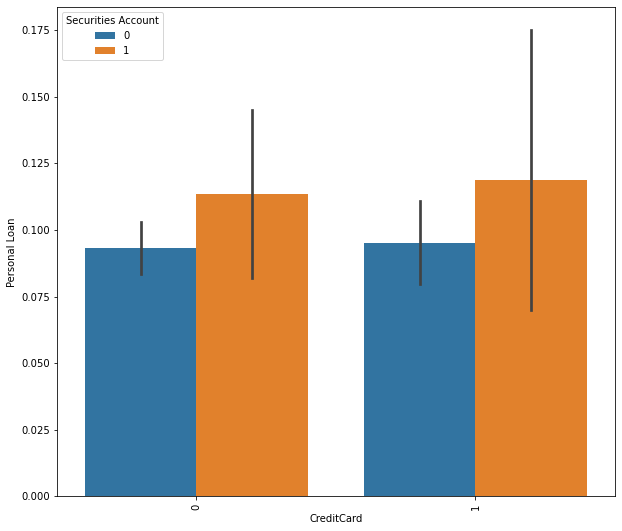

In [80]:
# Checking the relationship between Credit Card and Securities Account with respect to Personal Loan
fig=plt.figure(figsize=(10,9))
sns.barplot(x=df1['CreditCard'],y=df1['Personal Loan'],hue=df1['Securities Account'])
plt.xticks(rotation=90)
plt.show()

In [81]:
# Corelation Plot
corr = df1.corr()
corr.style.background_gradient(cmap='PuOr_r')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

In [82]:
#Splitting into independent and dependent variable
X=df1.drop(columns=['Experience (in years)','Personal Loan','ID'],axis=1)
y=df1['Personal Loan']
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=1)
print('Training shape:',X_train.shape,y_train.shape)
print('Testing shape:',X_test.shape,y_test.shape)

Training shape: (4000, 11) (4000,)
Testing shape: (1000, 11) (1000,)


# Model Building Approach using Modular Code

In [83]:
class Classification:
    def __init__(self,Model):
        print('----Model Building----')
        print()
        print('-----BASE MODEL RESULTS')
        self.Model=Model
    
    def fit_data(self,data,targets):
        print()
        print('----Fitting the Data to the Model')
        self.Model=self.Model.fit(data,targets)
        return self.Model
    
    def text_representation(self,Model):
        print('Intepretation of the Tree')
        self.Model=tree.export(self.Model)
    
    def predict_data(self,data):
        print()
        self.y_pred=self.Model.predict(data)
    def result_training_data(self,y_true,y_pred):
            print()
            print('-----RESULT OF TRAINING DATA-----')
            print()
            print('-----Accuracy score for Training Data-----')
            accuracy_score_train=metrics.accuracy_score(y_true,self.Model.predict(y_pred))
            print(accuracy_score_train)
            print()
            print('-----Confusion Matrix for Training Data-----')
            print()
            confusion_matrix_train=metrics.confusion_matrix(y_true,self.Model.predict(y_pred))
            print(confusion_matrix_train)
            print()
            print('-----Classification Report of Training Data-----')
            classification_report_train=metrics.classification_report(y_true,self.Model.predict(y_pred))
            print(classification_report_train)
            print()
            print('-----roc_auc_score of Training Data------')
            roc_auc_score_train=metrics.roc_auc_score(y_true,self.Model.predict(y_pred))
            print(roc_auc_score_train)
            print()
    def result_testing_data(self,y_true,y_pred):
            print('-----RESULT OF TESTING DATA-----')
            print('-----Accuracy score for Testing Data-----')
            accuracy_score_test=metrics.accuracy_score(y_true,self.y_pred)
            print(accuracy_score_test)
            print()
            print('-----Confusion Matrix for Testing Data-----')
            confusion_matrix_test=metrics.confusion_matrix(y_true,self.y_pred)
            print(confusion_matrix_test)
            print()
            print('-----Classification Report of Testing Data-----')
            classification_report_test=metrics.classification_report(y_true,self.y_pred)
            print(classification_report_test)
            print()
            print('-----roc_auc_score of Testing Data------')
            roc_auc_score_test=metrics.roc_auc_score(y_true,self.y_pred)
            print(roc_auc_score_test)
            print()
    def params_tune(self,param_grid):
        print('-----TUNED MODEL RESULTS')
        print()
        print('----SETTING THE PARAMS-------')
        self.param_grid=param_grid
        return self.param_grid

    def fit_data_tune(self,features,targets):
        print('----FITTING THE MODEL-----')
        self.Model=model_selection.GridSearchCV(self.Model,param_grid=self.param_grid,scoring='recall',cv=5,verbose=3,n_jobs=-1)
        self.Model=self.Model.fit(features,targets)
        return self.Model
    
    def predict_data_tune(self,data):
        print('----PREDICTING THE MODEL----')
        self.y_pred=self.Model.predict(data)
    
    def result_training_data_tune(self,y_true,y_pred):
        print()
        print('-----RESULT OF TRAINING DATA-----')
        print()
        print('-----Accuracy score for Training Data-----')
        accuracy_score_train=metrics.accuracy_score(y_true,self.Model.predict(y_pred))
        print(accuracy_score_train)
        print()
        print('-----Confusion Matrix for Training Data-----')
        print()
        confusion_matrix_train=metrics.confusion_matrix(y_true,self.Model.predict(y_pred))
        print(confusion_matrix_train)
        print()
        print('-----Classification Report of Training Data-----')
        classification_report_train=metrics.classification_report(y_true,self.Model.predict(y_pred))
        print(classification_report_train)
        print()
        print('-----roc_auc_score of Training Data------')
        roc_auc_score_train=metrics.roc_auc_score(y_true,self.Model.predict(y_pred))
        print(roc_auc_score_train)
        print()
    def result_testing_data_tune(self,y_true,y_pred):
        print('-----RESULT OF TESTING DATA-----')
        print('-----Accuracy score for Testing Data-----')
        accuracy_score_test=metrics.accuracy_score(y_true,self.y_pred)
        print(accuracy_score_test)
        print()
        print('-----Confusion Matrix for Testing Data-----')
        confusion_matrix_test=metrics.confusion_matrix(y_true,self.y_pred)
        print(confusion_matrix_test)
        print()
        print('-----Classification Report of Testing Data-----')
        classification_report_test=metrics.classification_report(y_true,self.y_pred)
        print(classification_report_test)
        print()
        print('-----roc_auc_score of Testing Data------')
        roc_auc_score_test=metrics.roc_auc_score(y_true,self.y_pred)
        print(roc_auc_score_test)
        print()

# LOGISTIC REGRESSION

In [84]:
#Logistic Regression Model Create and Tuned The Model
Logistic_Model=Classification(linear_model.LogisticRegression(random_state=1,class_weight={0:1,1:9}))
Logistic_Model.fit_data(X_train,y_train)
y_pred_logistic=Logistic_Model.predict_data(X_test)
Logistic_Model.result_training_data(y_train,X_train)
Logistic_Model.result_testing_data(y_test,y_pred_logistic)
Logistic_Model_tune=Classification(linear_model.LogisticRegression(random_state=1,class_weight={0:1,1:9}))
Logistic_Model_tune.params_tune(param_grid={
    'penalty':['l1', 'l2','elasticnet', 'none'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
})
Logistic_Model_tune.fit_data_tune(X_train,y_train)
y_pred_tune=Logistic_Model_tune.predict_data_tune(X_test)
Logistic_Model_tune.result_training_data_tune(y_train,X_train)
Logistic_Model_tune.result_testing_data_tune(y_test,y_pred_tune)


----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.85325

-----Confusion Matrix for Training Data-----

[[3078  542]
 [  45  335]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      3620
           1       0.38      0.88      0.53       380

    accuracy                           0.85      4000
   macro avg       0.68      0.87      0.72      4000
weighted avg       0.93      0.85      0.88      4000


-----roc_auc_score of Training Data------
0.8659275952311719

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.843

-----Confusion Matrix for Testing Data-----
[[760 140]
 [ 17  83]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.98      0.84      0.91       900
        

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or 'none

# DECISION TREE

In [85]:
decision_model=tree.DecisionTreeClassifier(random_state=1,class_weight={0:1,1:9})
decision_model.fit(X_train,y_train)
print('Base Training Performance of the Model')
y_pred_train=decision_model.predict(X_train)
print('Confusion matrix of Training DataSet')
print()
confusion_matrix_decision=metrics.confusion_matrix(y_train,y_pred_train)
print(confusion_matrix_decision)
print()
print('Classification Report of Training Dataset')
classification_report_decision=metrics.classification_report(y_train,y_pred_train)
print()
print(classification_report_decision)
print('roc_auc score of Training Data')
roc_auc_decision=metrics.roc_auc_score(y_train,y_pred_train)
print(roc_auc_decision)
print('Base Testing Performance of the Model')
y_pred_test=decision_model.predict(X_test)
print('Confusion matrix of Testing DataSet')
print()
confusion_matrix_decision_test=metrics.confusion_matrix(y_test,y_pred_test)
print(confusion_matrix_decision_test)
print()
print('Classification Report of Testing Dataset')
classification_report_decision_test=metrics.classification_report(y_test,y_pred_test)
print()
print(classification_report_decision_test)
print('roc_auc score of Testing Data')
roc_auc_decision_test=metrics.roc_auc_score(y_test,y_pred_test)
print(roc_auc_decision_test)

Base Training Performance of the Model
Confusion matrix of Training DataSet

[[3620    0]
 [   0  380]]

Classification Report of Training Dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3620
           1       1.00      1.00      1.00       380

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

roc_auc score of Training Data
1.0
Base Testing Performance of the Model
Confusion matrix of Testing DataSet

[[891   9]
 [ 16  84]]

Classification Report of Testing Dataset

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       900
           1       0.90      0.84      0.87       100

    accuracy                           0.97      1000
   macro avg       0.94      0.92      0.93      1000
weighted avg       0.97      0.97      0.97      1000

roc_auc score of Testi

In [86]:
# Textual Representation of the Base Tree
text_representation = tree.export_text(decision_model)
print(text_representation)

|--- feature_1 <= 92.50
|   |--- feature_4 <= 2.95
|   |   |--- class: 0
|   |--- feature_4 >  2.95
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_4 <= 3.95
|   |   |   |   |--- feature_6 <= 100.50
|   |   |   |   |   |--- feature_1 <= 68.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  68.50
|   |   |   |   |   |   |--- feature_4 <= 3.05
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  3.05
|   |   |   |   |   |   |   |--- feature_2 <= 94714.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 90437.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  90437.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 83.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  83.50
|   |   |   |   |   |   |   |   |   |   |   

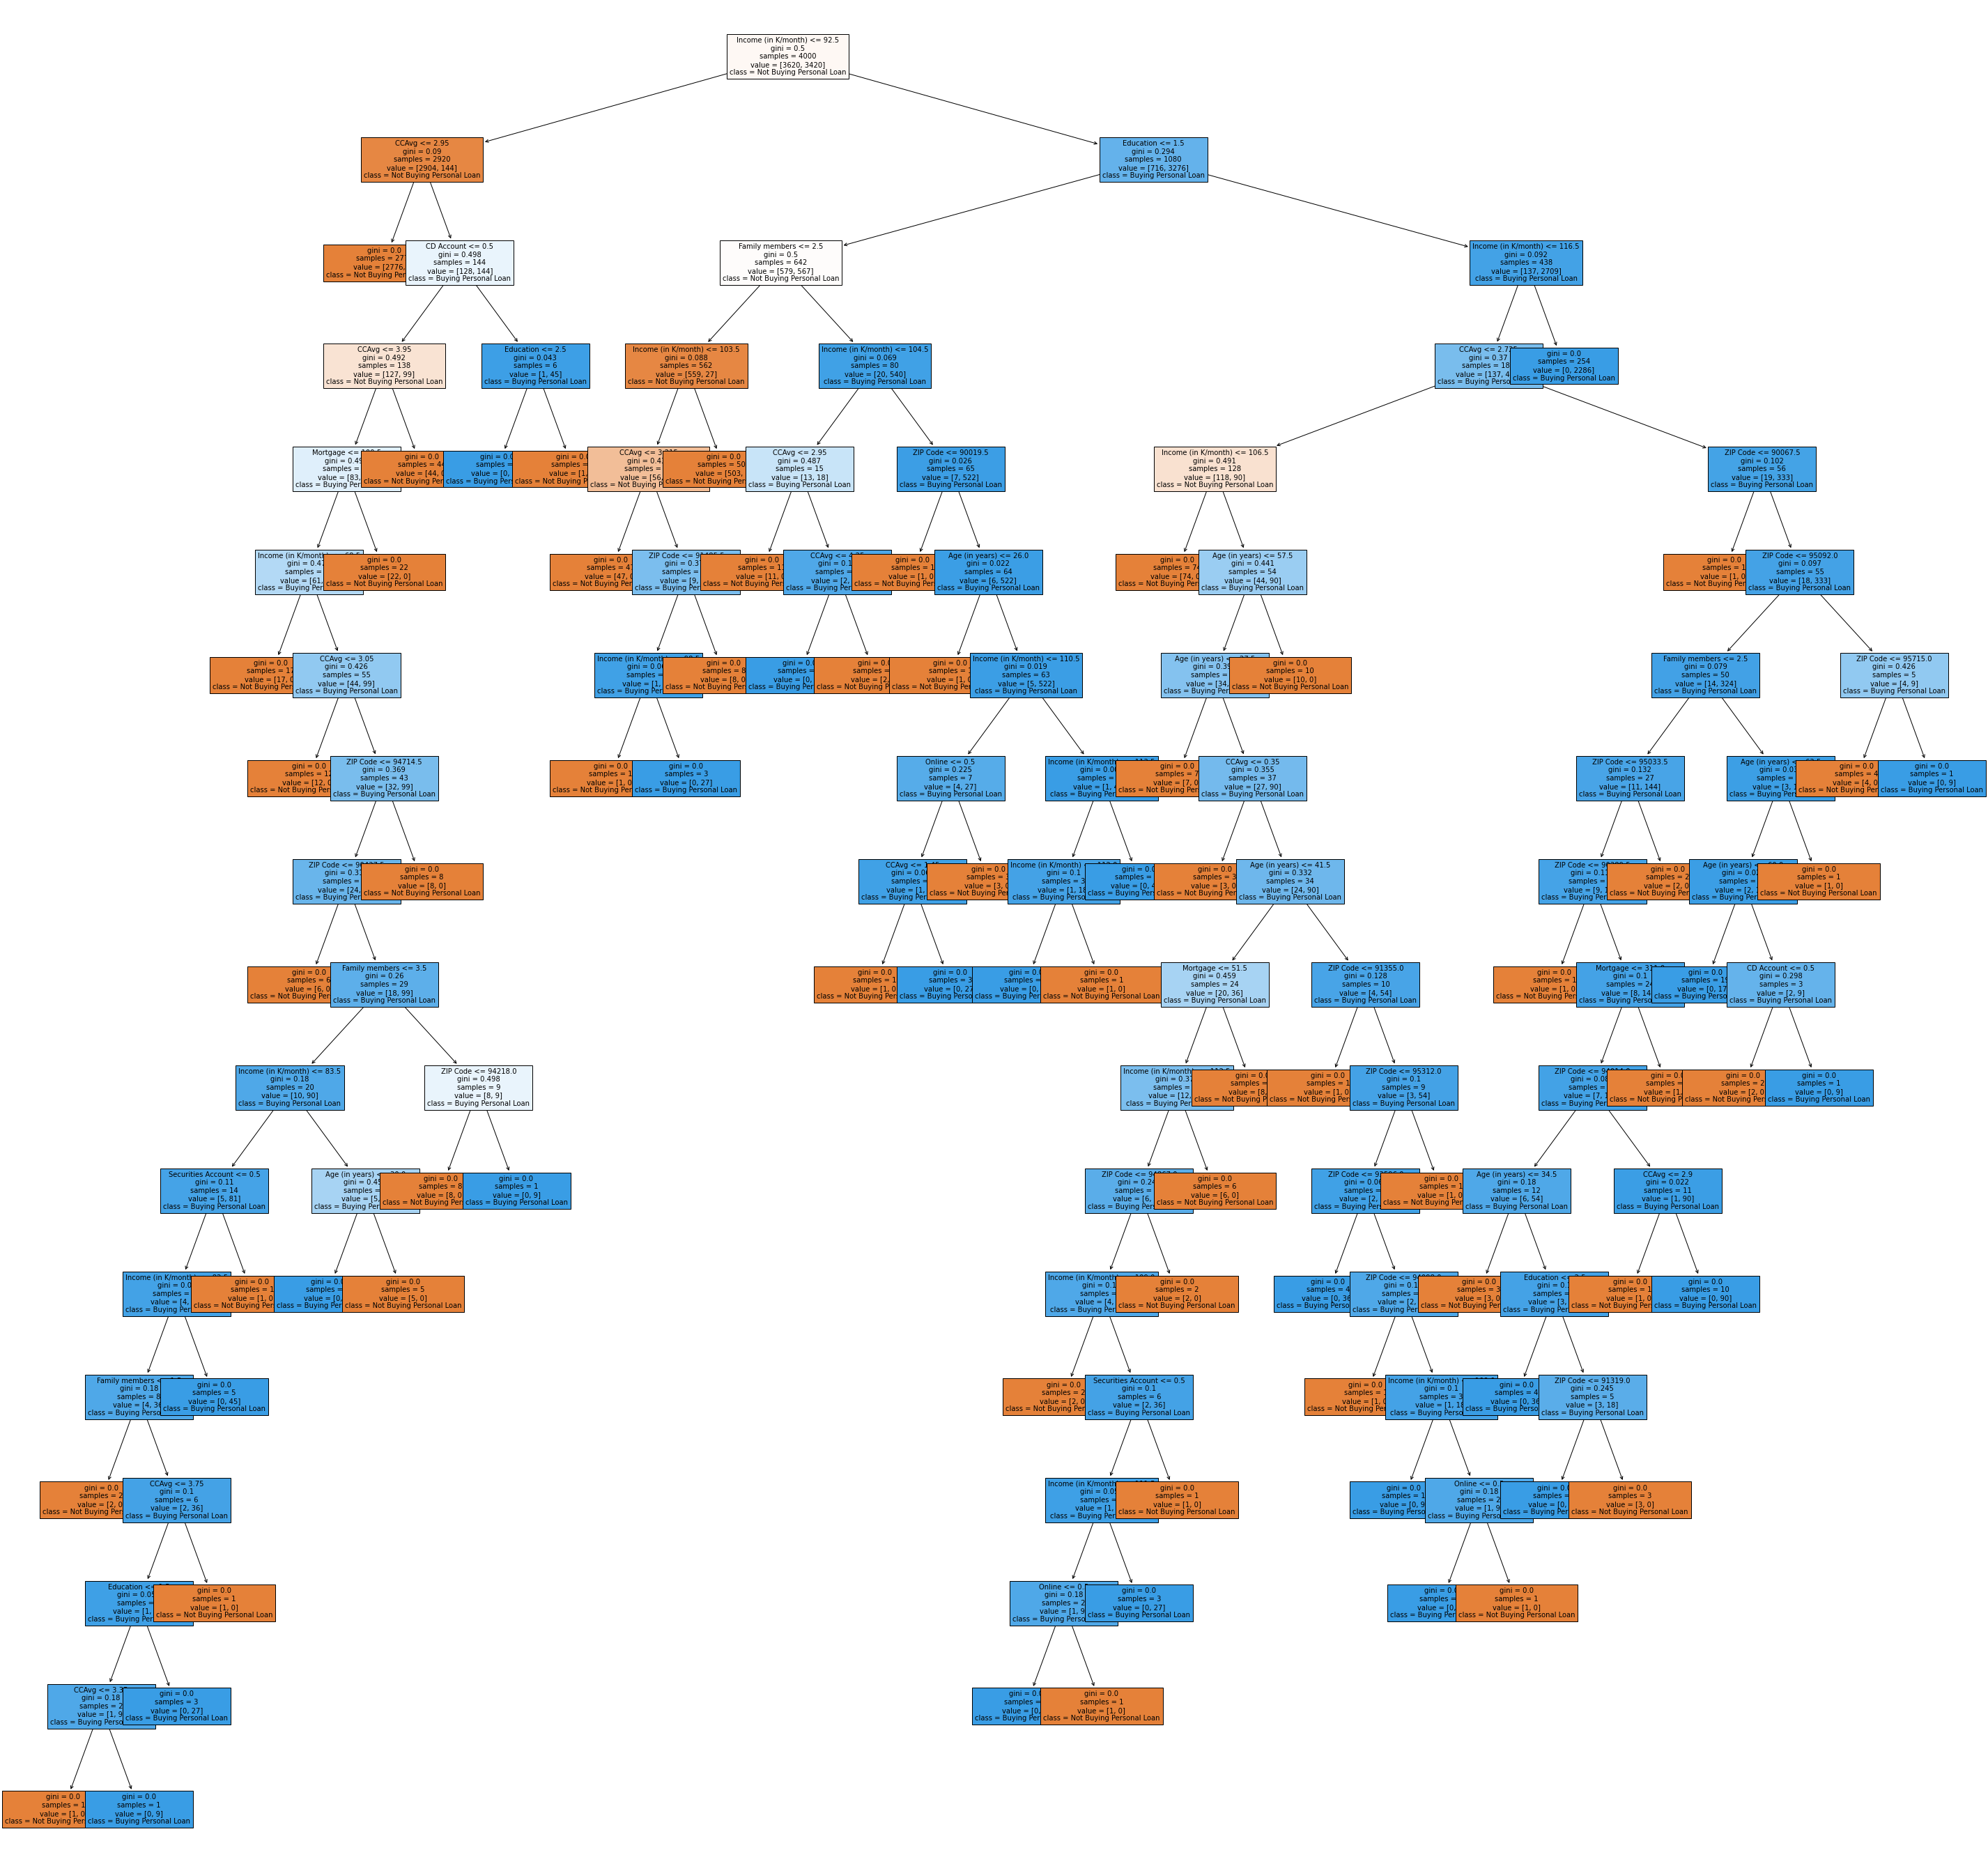

In [87]:
# Plotting Base Tree
plt.figure(figsize=(50,49))
features = X_train.columns
classes = ['Not Buying Personal Loan','Buying Personal Loan']
tree.plot_tree(decision_model,feature_names=features,class_names=classes,filled=True,fontsize=10)
plt.show()

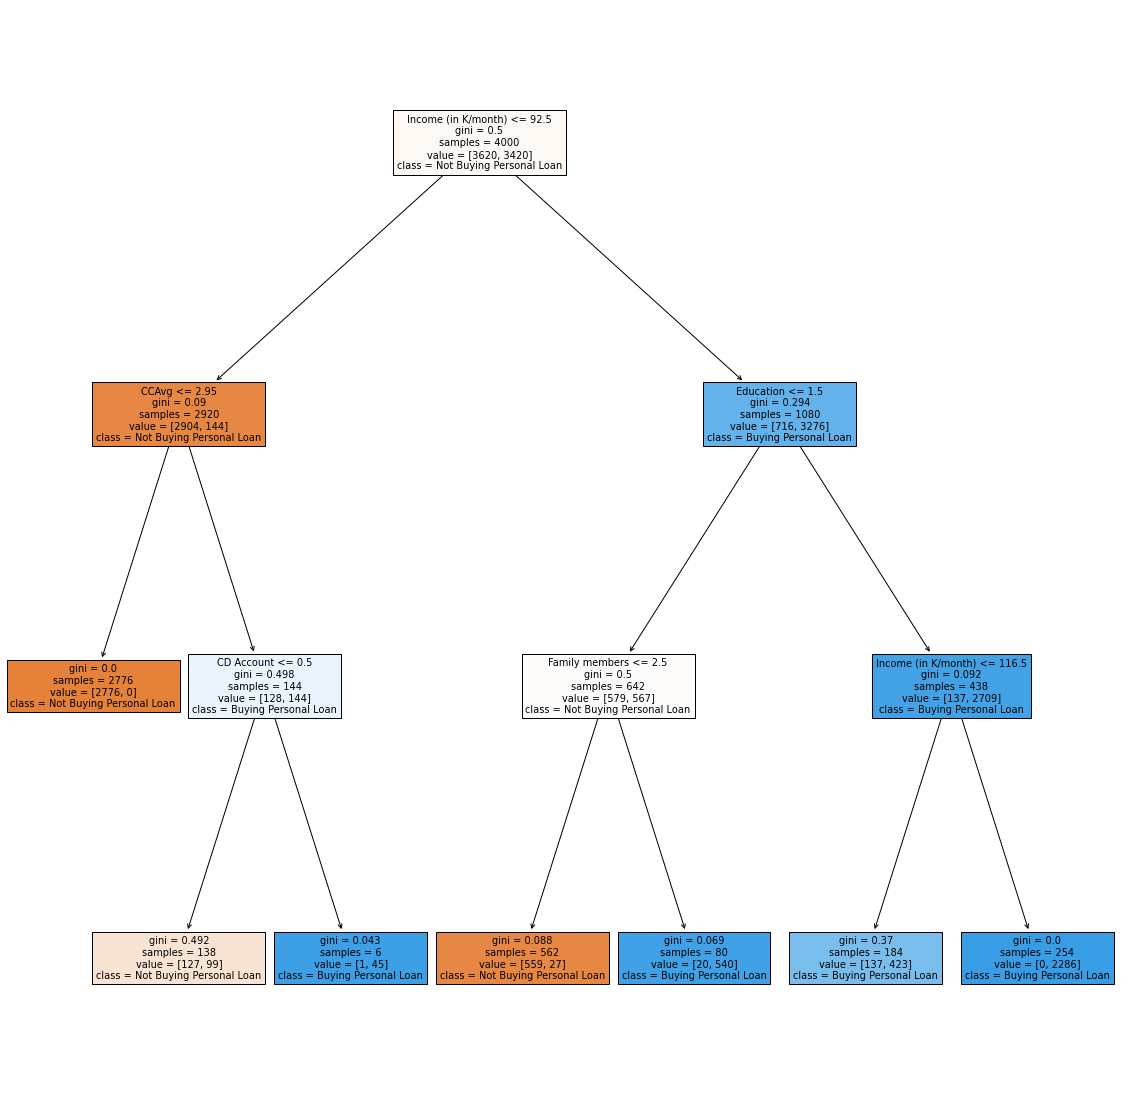

In [88]:
#Tuning The Model

param_grid={ 'max_depth':np.arange(2,15,1),
    'min_samples_split':np.arange(2,6,1),
    'min_samples_leaf':np.arange(1,6,1)}

gcv = model_selection.GridSearchCV(estimator=decision_model,param_grid=param_grid,scoring='recall',n_jobs=-1)
gcv.fit(X_train,y_train)
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize=(20,20))
features = X_train.columns
classes = ['Not Buying Personal Loan','Buying Personal Loan']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

We can see that tree is pruned and there is improvement in test accuracy.But still there is still scope of improvement.

# Post pruning techniques of Decision Tree

There are several post pruning techniques. Cost complexity pruning is one of the important among them.

Cost Complexity Pruning
Decision trees can easily overfit. One way to avoid it is to limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc. But a most effective way is to use post pruning methods like cost complexity pruning. This helps to improve test accuracy and get a better model.

Cost complexity pruning is all about finding the right parameter for alpha.We will get the alpha values for this tree and will check the accuracy with the pruned trees.

In [89]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00316867 0.00764807 0.01972504 0.05854153 0.29369419]


In [90]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

We will remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node

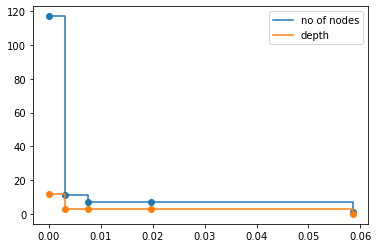

In [91]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

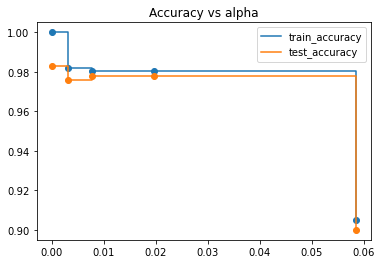

In [92]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(metrics.accuracy_score(y_train_pred,y_train))
    test_acc.append(metrics.accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.020

In [93]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020,class_weight={0:1,1:9})
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {metrics.roc_auc_score(y_train_pred,y_train)}')
print(f'Test score {metrics.roc_auc_score(y_test_pred,y_test)}')

Train score 0.845727281396437
Test score 0.8289733746782737


We can see that now our model is not overfiting and performance on test data have improved

# PRUNED DECISION TREE

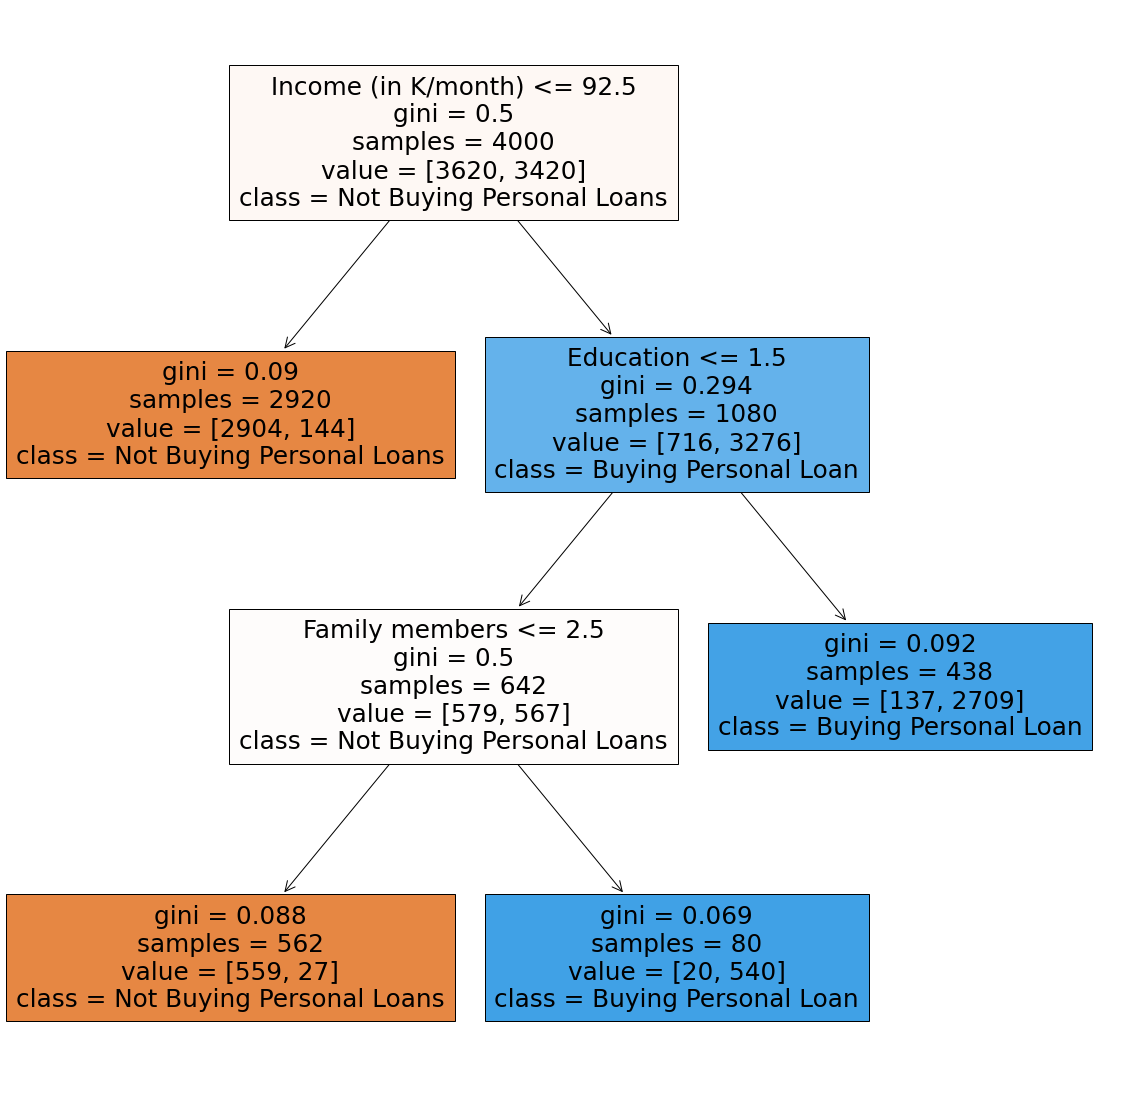

In [94]:
# Best Pruned Decision Tree
plt.figure(figsize=(20,20))
features = X_train.columns
classes = ['Not Buying Personal Loans','Buying Personal Loan']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

# DECISION TREE(TUNED MODEL)

In [95]:

print('Tuned Training Performance of the Model')
print('Confusion matrix of Training DataSet')
confusion_matrix_decision=metrics.confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_decision)
print()
print('Classification Report of Training Dataset')
classification_report_decision_tune=metrics.classification_report(y_train,y_train_pred)
print()
print(classification_report_decision_tune)
print('roc_auc score of Training Data')
roc_auc_decision_tune=metrics.roc_auc_score(y_train,y_train_pred)
print(roc_auc_decision_tune)
print('Confusion matrix of Testing DataSet')
print()
confusion_matrix_decision_tune_test=metrics.confusion_matrix(y_test,y_test_pred)
print(confusion_matrix_decision_tune_test)
print()
print('Classification Report of Testing Dataset')
classification_report_decision_tune_test=metrics.classification_report(y_test,y_test_pred)
print()
print(classification_report_decision_tune_test)
print('roc_auc score of Testing Data')
roc_auc_decision_tune_test=metrics.roc_auc_score(y_test,y_test_pred)
print(roc_auc_decision_tune_test)

Tuned Training Performance of the Model
Confusion matrix of Training DataSet
[[3463  157]
 [  19  361]]

Classification Report of Training Dataset

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3620
           1       0.70      0.95      0.80       380

    accuracy                           0.96      4000
   macro avg       0.85      0.95      0.89      4000
weighted avg       0.97      0.96      0.96      4000

roc_auc score of Training Data
0.9533149171270718
Confusion matrix of Testing DataSet

[[857  43]
 [ 12  88]]

Classification Report of Testing Dataset

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       900
           1       0.67      0.88      0.76       100

    accuracy                           0.94      1000
   macro avg       0.83      0.92      0.87      1000
weighted avg       0.95      0.94      0.95      1000

roc_auc score of Testing Data
0.9161111111111

We can see that the size of decision tree significantly got reduced. Also postpruning is much efficient than prepruning.

<AxesSubplot:>

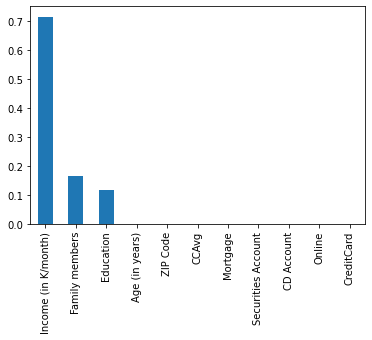

In [96]:
# Feature Importance in Decision Tree
feat_importances = pd.Series(clf_.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='bar')

# RANDOM FOREST(BASE MODEL)

In [97]:
rf_model=ensemble.RandomForestClassifier(random_state=1,class_weight={0:1,1:9})
rf_model.fit(X_train,y_train)
print('Base Training Performance of the Model')
y_pred_train=rf_model.predict(X_train)
print('Confusion matrix of Training DataSet')
print()
confusion_matrix_rf=metrics.confusion_matrix(y_train,y_pred_train)
print(confusion_matrix_rf)
print()
print('Classification Report of Training Dataset')
classification_report_rf=metrics.classification_report(y_train,y_pred_train)
print()
print(classification_report_rf)
print('roc_auc score of Training Data')
roc_auc_rf=metrics.roc_auc_score(y_train,y_pred_train)
print(roc_auc_rf)
print('Base Testing Performance of the Model')
y_pred_test=rf_model.predict(X_test)
print('Confusion matrix of Testing DataSet')
print()
confusion_matrix_rf_test=metrics.confusion_matrix(y_test,y_pred_test)
print(confusion_matrix_rf_test)
print()
print('Classification Report of Testing Dataset')
classification_report_rf_test=metrics.classification_report(y_test,y_pred_test)
print()
print(classification_report_rf_test)
print('roc_auc score of Testing Data')
roc_auc_rf_test=metrics.roc_auc_score(y_test,y_pred_test)
print(roc_auc_rf_test)

Base Training Performance of the Model
Confusion matrix of Training DataSet

[[3620    0]
 [   0  380]]

Classification Report of Training Dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3620
           1       1.00      1.00      1.00       380

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

roc_auc score of Training Data
1.0
Base Testing Performance of the Model
Confusion matrix of Testing DataSet

[[896   4]
 [ 19  81]]

Classification Report of Testing Dataset

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       900
           1       0.95      0.81      0.88       100

    accuracy                           0.98      1000
   macro avg       0.97      0.90      0.93      1000
weighted avg       0.98      0.98      0.98      1000

roc_auc score of Testi

In [98]:
# Text Representation of Random Forest
text_representation_rf= tree.export_text(rf_model.estimators_[0])
print(text_representation_rf)

|--- feature_1 <= 98.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_0 <= 64.50
|   |   |   |--- feature_0 <= 43.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_0 >  43.50
|   |   |   |   |--- feature_1 <= 74.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_1 >  74.50
|   |   |   |   |   |--- feature_1 <= 76.50
|   |   |   |   |   |   |--- feature_4 <= 3.10
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_4 >  3.10
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_1 >  76.50
|   |   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |   |--- feature_1 <= 83.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 3.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- feature_4 >  3.00
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 4.05
|   |   |   |   |   |   |   |   |  

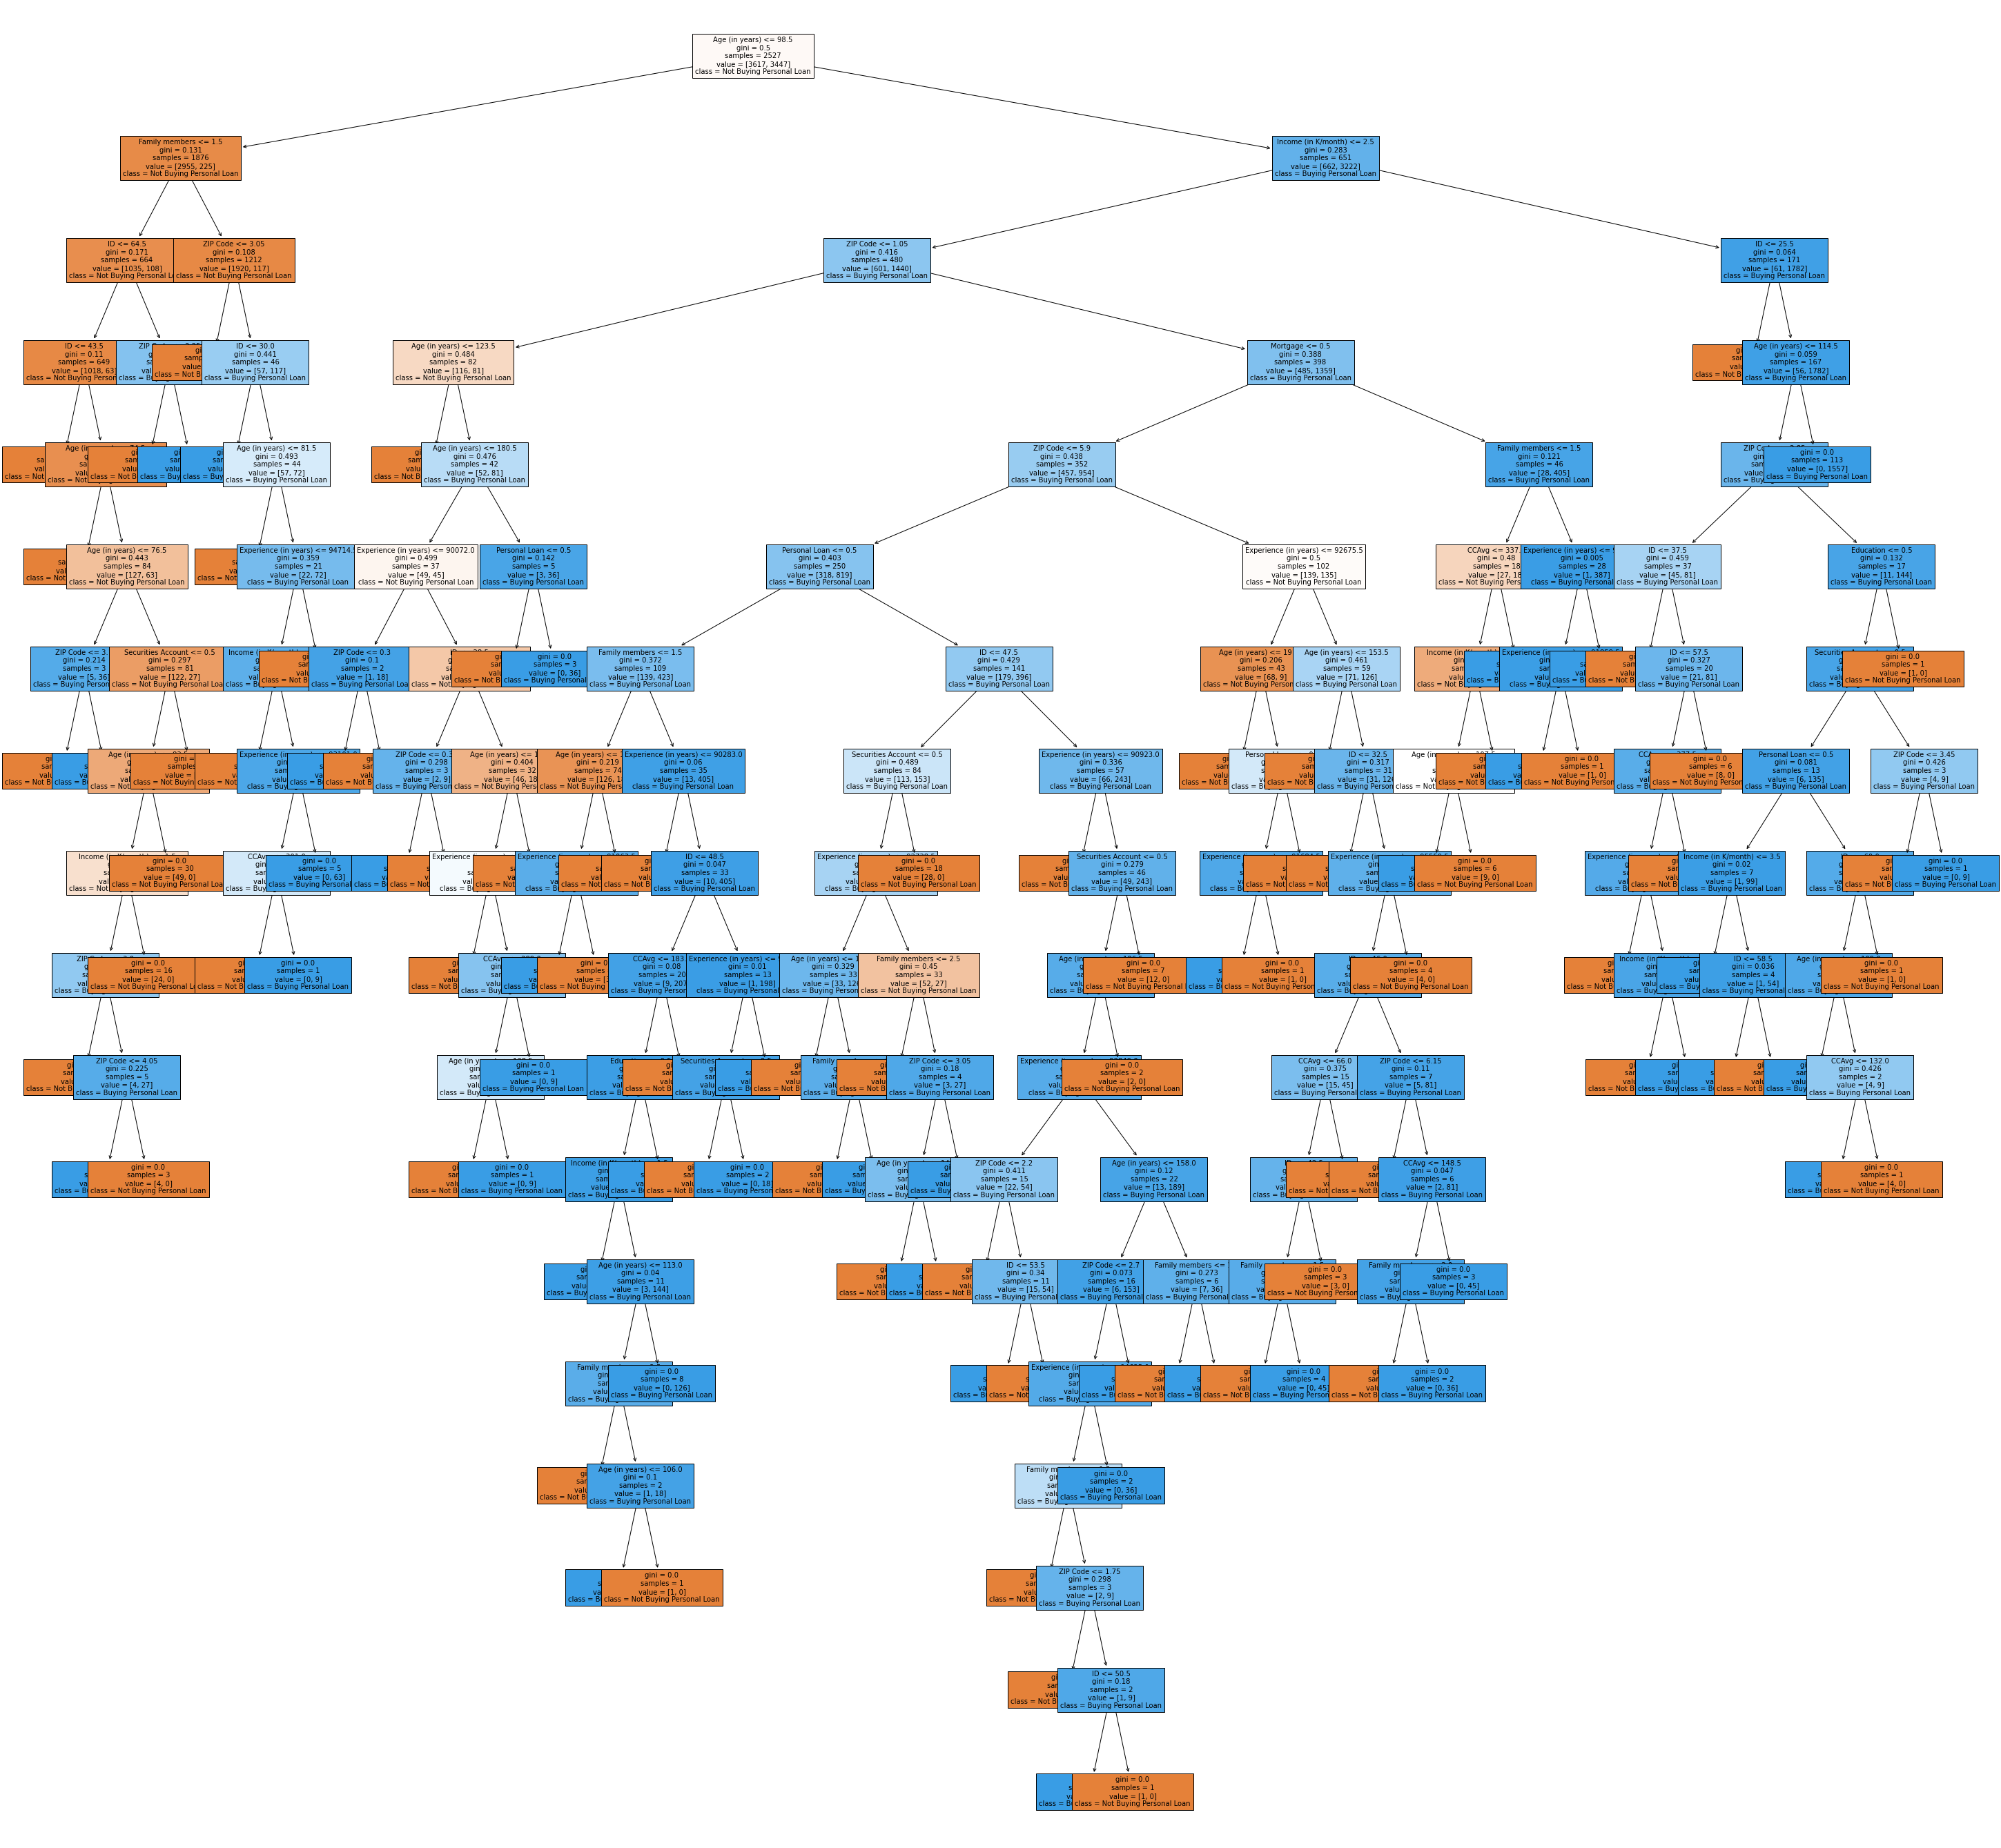

In [99]:
# Plotting One Single Decision Tree from a Random Forest
plt.figure(figsize=(50,49))
features = df1.columns
classes = ['Not Buying Personal Loan','Buying Personal Loan']
tree.plot_tree(rf_model.estimators_[0],feature_names=features,class_names=classes,filled=True,fontsize=10)
plt.show()

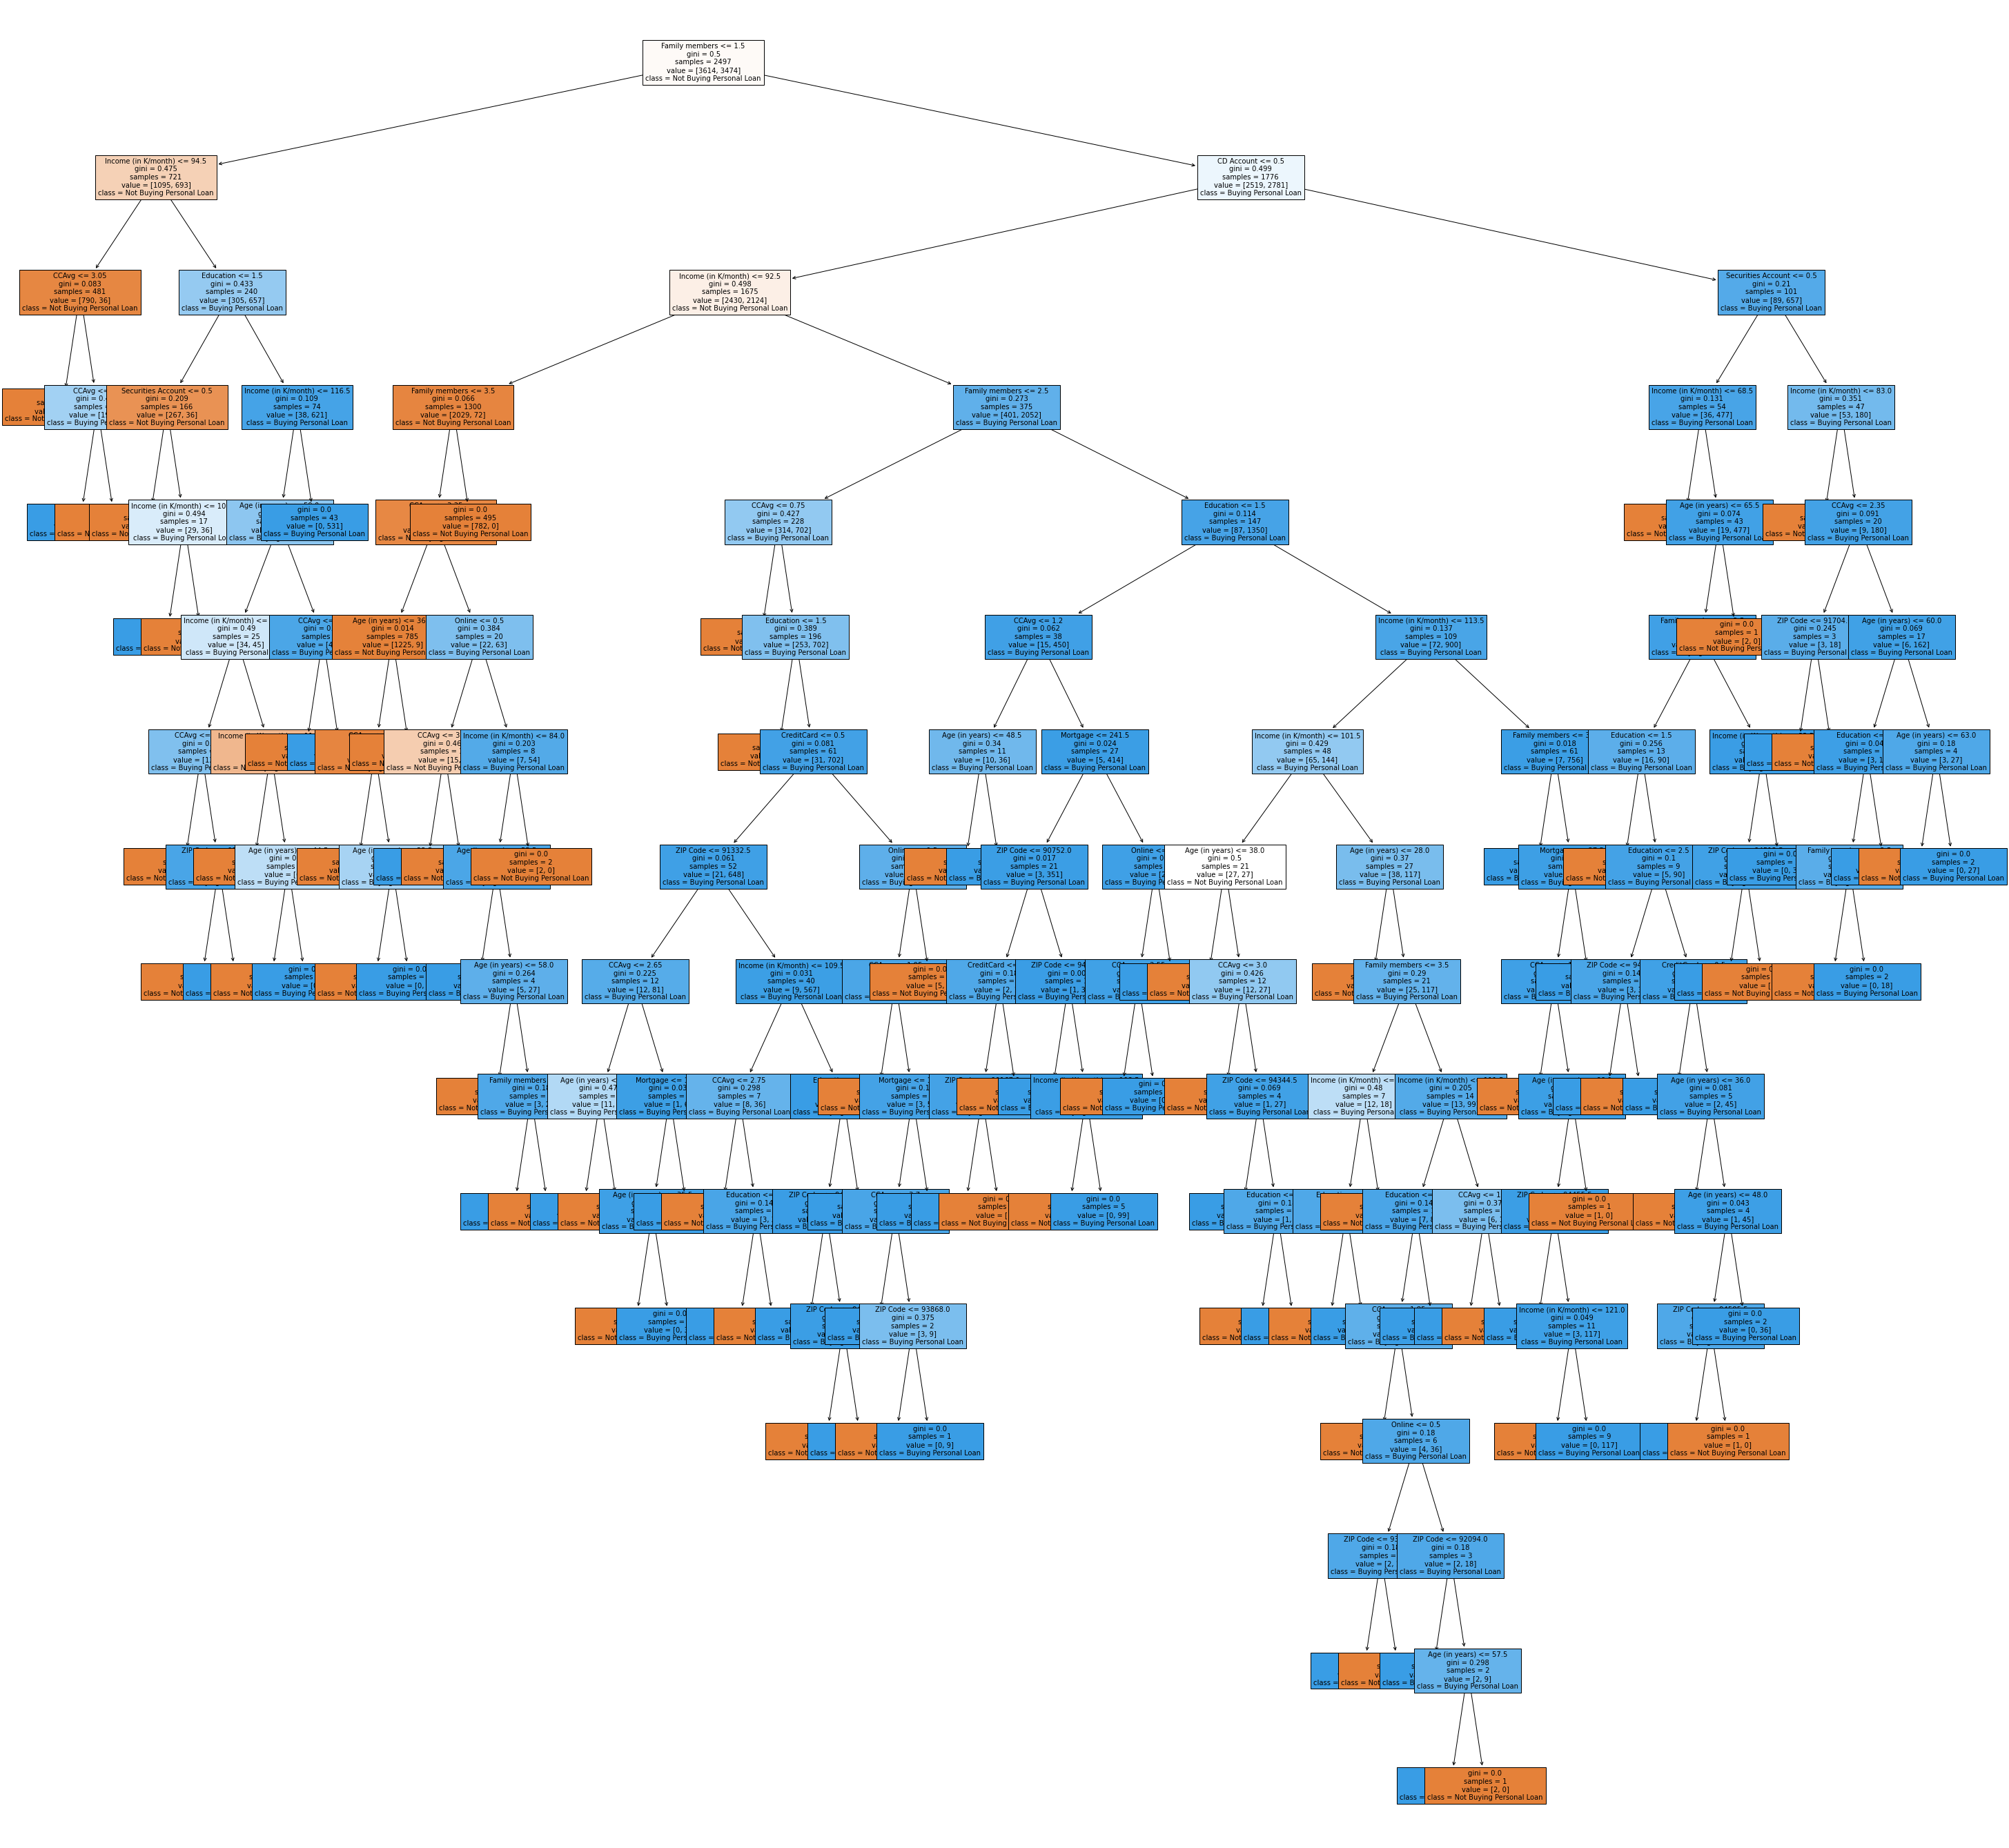

In [100]:
plt.figure(figsize=(50,49))
features = X_train.columns
classes = ['Not Buying Personal Loan','Buying Personal Loan']
tree.plot_tree(rf_model.estimators_[1],feature_names=features,class_names=classes,filled=True,fontsize=10)
plt.show()

# RANDOM FOREST(TUNED MODEL) AND ALSO PLOTTING THE PRUNED TREE

Fitting 5 folds for each of 260 candidates, totalling 1300 fits


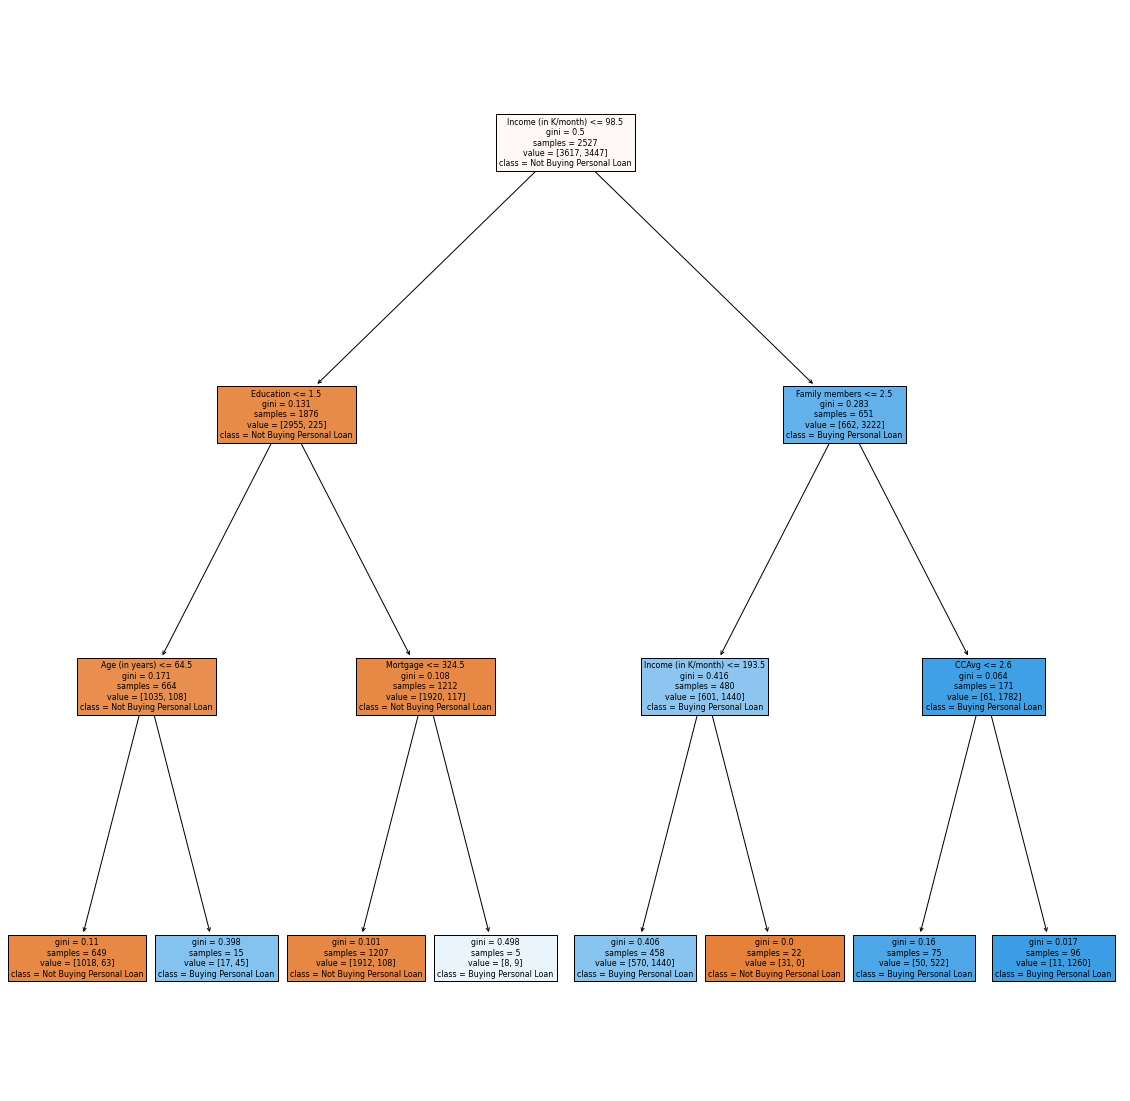

In [101]:
#Tuning The Model and Plotting the Pruned Tree

param_grid={'max_depth':np.arange(2,15,1),
    'min_samples_split':np.arange(2,6,1),
    'min_samples_leaf':np.arange(1,6,1)}
gcv = model_selection.GridSearchCV(estimator=rf_model,param_grid=param_grid,scoring='recall',n_jobs=-1,verbose=3)
gcv.fit(X_train,y_train)
model_rf = gcv.best_estimator_
model_rf.fit(X_train,y_train)
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)
plt.figure(figsize=(20,20))
features = X_train.columns
classes = ['Not Buying Personal Loan','Buying Personal Loan']
tree.plot_tree(model_rf.estimators_[0],feature_names=features,class_names=classes,filled=True)
plt.show()

In [102]:

print('Tuned Training Performance of the Random Forest Model')
print('Confusion matrix of Training DataSet')
confusion_matrix_rf_tune=metrics.confusion_matrix(y_train,y_train_pred_rf)
print()
print(confusion_matrix_rf_tune)
print()
print('Classification Report of Training Dataset')
classification_report_rf_tune=metrics.classification_report(y_train,y_train_pred_rf)
print()
print(classification_report_rf_tune)
print('roc_auc score of Training Data')
roc_auc_rf_tune=metrics.roc_auc_score(y_train,y_train_pred_rf)
print(roc_auc_rf_tune)
print('Tuned Testing Performance of the Model')
print('Confusion matrix of Testing DataSet')
print()
confusion_matrix_rf_tuned_test=metrics.confusion_matrix(y_test,y_test_pred_rf)
print(confusion_matrix_rf_tuned_test)
print()
print('Classification Report of Testing Dataset')
classification_report_rf_tuned_test=metrics.classification_report(y_test,y_test_pred_rf)
print()
print(classification_report_rf_tuned_test)
print('roc_auc score of Testing Data')
roc_auc_decision_rf_tuned_test=metrics.roc_auc_score(y_test,y_test_pred_rf)
print(roc_auc_decision_rf_tuned_test)

Tuned Training Performance of the Random Forest Model
Confusion matrix of Training DataSet

[[3234  386]
 [  11  369]]

Classification Report of Training Dataset

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3620
           1       0.49      0.97      0.65       380

    accuracy                           0.90      4000
   macro avg       0.74      0.93      0.80      4000
weighted avg       0.95      0.90      0.91      4000

roc_auc score of Training Data
0.9322113986624019
Tuned Testing Performance of the Model
Confusion matrix of Testing DataSet

[[789 111]
 [  7  93]]

Classification Report of Testing Dataset

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       900
           1       0.46      0.93      0.61       100

    accuracy                           0.88      1000
   macro avg       0.72      0.90      0.77      1000
weighted avg       0.94      0.88      0.90   

<AxesSubplot:>

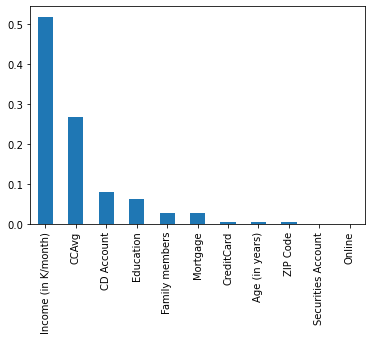

In [103]:
# Feature Importance of Random Forest
feat_importances_rf = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances_rf.nlargest(11).plot(kind='bar')

# Conclusion

As per the Analysis and insights understood by the dataset,The company should target the customer with Income between 100 and 200k,CCAvg between 2.5 to 10 and Education as Professional 

# The Accuracy is 95.28%
Decision Treee
**We can improve it with some technique**
>* **using log in skewed data** 
> 
>* **Z Score** 
>* **Quantile method (IQR)**
>
>* **Standerd scaler or Normalizer**
> 
>* **Remove duplicate values and columns**
> 
>* **Hyper Parameter Tuning**
> 
>* **Cross Validation** 
> 
>* **Check**
>*1 R2 score 
>*2 F1 score
>*3 Recall

## Thus the data cleaning, EDA, transformation and modelling has been done successfully!